<a href="https://colab.research.google.com/github/AlineBarrucci26/AlineBarrucci26/blob/main/TCC_versao_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Bibliotecas utilizadas

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from pypfopt import risk_models
from pypfopt import EfficientSemivariance
from pypfopt import EfficientFrontier
from pypfopt import expected_returns
from pypfopt import HRPOpt
from pypfopt import plotting
import matplotlib.pyplot as plt
# importando as ferramentas necessárias
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
import matplotlib.pyplot as plt

In [ ]:
# Imports
from datetime import date, time, datetime, timedelta
from dateutil.relativedelta import relativedelta

In [ ]:
tamanho_campos=[2,8,2,12,3,12,10,3,4,13,13,13,13,13,13,13,5,18,18,13,1,8,7,13,12,3]

In [ ]:
dados_acoes_2012 =pd.read_fwf('COTAHIST_A2012.TXT', widths=tamanho_campos, header=0)
dados_acoes_2013 =pd.read_fwf('COTAHIST_A2013.TXT', widths=tamanho_campos, header=0)
dados_acoes_2014 =pd.read_fwf('COTAHIST_A2014.TXT', widths=tamanho_campos, header=0)
dados_acoes_2015 =pd.read_fwf('COTAHIST_A2015.TXT', widths=tamanho_campos, header=0)
dados_acoes_2016 =pd.read_fwf('COTAHIST_A2016.TXT', widths=tamanho_campos, header=0)
dados_acoes_2017 =pd.read_fwf('COTAHIST_A2017.TXT', widths=tamanho_campos, header=0)
dados_acoes_2018 =pd.read_fwf('COTAHIST_A2018.TXT', widths=tamanho_campos, header=0)
dados_acoes_2019 =pd.read_fwf('COTAHIST_A2019.TXT', widths=tamanho_campos, header=0)

In [ ]:
## Nomear as colunas
dados_acoes_2012.columns = [
"tipo_registro",
"data_pregao",
"cod_bdi",
"cod_negociacao",
"tipo_mercado",
"noma_empresa",
"especificacao_papel",
"prazo_dias_merc_termo",
"moeda_referencia",
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"numero_negocios",
"quantidade_papeis_negociados",
"volume_total_negociado",
"preco_exercicio",
"ìndicador_correcao_precos",
"data_vencimento" ,
"fator_cotacao",
"preco_exercicio_pontos",
"codigo_isin",
"num_distribuicao_papel"]

# Eliminar a última linha
linha=len(dados_acoes_2012["data_pregao"])
dados_acoes_2012=dados_acoes_2012.drop(linha-1)


# Ajustar valores com virgula (dividir os valores dessas colunas por 100)
listaVirgula=[
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"volume_total_negociado",
"preco_exercicio",
"preco_exercicio_pontos"
    
]

for coluna in listaVirgula:
    dados_acoes_2012[coluna]=[i/100. for i in dados_acoes_2012[coluna]]


In [ ]:
## Nomear as colunas
dados_acoes_2013.columns = [
"tipo_registro",
"data_pregao",
"cod_bdi",
"cod_negociacao",
"tipo_mercado",
"noma_empresa",
"especificacao_papel",
"prazo_dias_merc_termo",
"moeda_referencia",
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"numero_negocios",
"quantidade_papeis_negociados",
"volume_total_negociado",
"preco_exercicio",
"ìndicador_correcao_precos",
"data_vencimento" ,
"fator_cotacao",
"preco_exercicio_pontos",
"codigo_isin",
"num_distribuicao_papel"]

# Eliminar a última linha
linha=len(dados_acoes_2013["data_pregao"])
dados_acoes_2013=dados_acoes_2013.drop(linha-1)


# Ajustar valores com virgula (dividir os valores dessas colunas por 100)
listaVirgula=[
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"volume_total_negociado",
"preco_exercicio",
"preco_exercicio_pontos"
    
]

for coluna in listaVirgula:
    dados_acoes_2013[coluna]=[i/100. for i in dados_acoes_2013[coluna]]

In [ ]:
## Nomear as colunas
dados_acoes_2014.columns = [
"tipo_registro",
"data_pregao",
"cod_bdi",
"cod_negociacao",
"tipo_mercado",
"noma_empresa",
"especificacao_papel",
"prazo_dias_merc_termo",
"moeda_referencia",
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"numero_negocios",
"quantidade_papeis_negociados",
"volume_total_negociado",
"preco_exercicio",
"ìndicador_correcao_precos",
"data_vencimento" ,
"fator_cotacao",
"preco_exercicio_pontos",
"codigo_isin",
"num_distribuicao_papel"]

# Eliminar a última linha
linha=len(dados_acoes_2014["data_pregao"])
dados_acoes_2014=dados_acoes_2014.drop(linha-1)


# Ajustar valores com virgula (dividir os valores dessas colunas por 100)
listaVirgula=[
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"volume_total_negociado",
"preco_exercicio",
"preco_exercicio_pontos"
    
]

for coluna in listaVirgula:
    dados_acoes_2014[coluna]=[i/100. for i in dados_acoes_2014[coluna]]

In [ ]:
## Nomear as colunas
dados_acoes_2015.columns = [
"tipo_registro",
"data_pregao",
"cod_bdi",
"cod_negociacao",
"tipo_mercado",
"noma_empresa",
"especificacao_papel",
"prazo_dias_merc_termo",
"moeda_referencia",
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"numero_negocios",
"quantidade_papeis_negociados",
"volume_total_negociado",
"preco_exercicio",
"ìndicador_correcao_precos",
"data_vencimento" ,
"fator_cotacao",
"preco_exercicio_pontos",
"codigo_isin",
"num_distribuicao_papel"]

# Eliminar a última linha
linha=len(dados_acoes_2015["data_pregao"])
dados_acoes_2015=dados_acoes_2015.drop(linha-1)


# Ajustar valores com virgula (dividir os valores dessas colunas por 100)
listaVirgula=[
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"volume_total_negociado",
"preco_exercicio",
"preco_exercicio_pontos"
    
]

for coluna in listaVirgula:
    dados_acoes_2015[coluna]=[i/100. for i in dados_acoes_2015[coluna]]

In [ ]:
## Nomear as colunas
dados_acoes_2016.columns = [
"tipo_registro",
"data_pregao",
"cod_bdi",
"cod_negociacao",
"tipo_mercado",
"noma_empresa",
"especificacao_papel",
"prazo_dias_merc_termo",
"moeda_referencia",
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"numero_negocios",
"quantidade_papeis_negociados",
"volume_total_negociado",
"preco_exercicio",
"ìndicador_correcao_precos",
"data_vencimento" ,
"fator_cotacao",
"preco_exercicio_pontos",
"codigo_isin",
"num_distribuicao_papel"]

# Eliminar a última linha
linha=len(dados_acoes_2016["data_pregao"])
dados_acoes_2016=dados_acoes_2016.drop(linha-1)


# Ajustar valores com virgula (dividir os valores dessas colunas por 100)
listaVirgula=[
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"volume_total_negociado",
"preco_exercicio",
"preco_exercicio_pontos"
    
]

for coluna in listaVirgula:
    dados_acoes_2016[coluna]=[i/100. for i in dados_acoes_2016[coluna]]


In [ ]:
## Nomear as colunas
dados_acoes_2017.columns = [
"tipo_registro",
"data_pregao",
"cod_bdi",
"cod_negociacao",
"tipo_mercado",
"noma_empresa",
"especificacao_papel",
"prazo_dias_merc_termo",
"moeda_referencia",
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"numero_negocios",
"quantidade_papeis_negociados",
"volume_total_negociado",
"preco_exercicio",
"ìndicador_correcao_precos",
"data_vencimento" ,
"fator_cotacao",
"preco_exercicio_pontos",
"codigo_isin",
"num_distribuicao_papel"]

# Eliminar a última linha
linha=len(dados_acoes_2017["data_pregao"])
dados_acoes_2017=dados_acoes_2017.drop(linha-1)


# Ajustar valores com virgula (dividir os valores dessas colunas por 100)
listaVirgula=[
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"volume_total_negociado",
"preco_exercicio",
"preco_exercicio_pontos"
    
]

for coluna in listaVirgula:
    dados_acoes_2017[coluna]=[i/100. for i in dados_acoes_2017[coluna]]


In [ ]:
## Nomear as colunas
dados_acoes_2018.columns = [
"tipo_registro",
"data_pregao",
"cod_bdi",
"cod_negociacao",
"tipo_mercado",
"noma_empresa",
"especificacao_papel",
"prazo_dias_merc_termo",
"moeda_referencia",
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"numero_negocios",
"quantidade_papeis_negociados",
"volume_total_negociado",
"preco_exercicio",
"ìndicador_correcao_precos",
"data_vencimento" ,
"fator_cotacao",
"preco_exercicio_pontos",
"codigo_isin",
"num_distribuicao_papel"]

# Eliminar a última linha
linha=len(dados_acoes_2018["data_pregao"])
dados_acoes_2018=dados_acoes_2018.drop(linha-1)


# Ajustar valores com virgula (dividir os valores dessas colunas por 100)
listaVirgula=[
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"volume_total_negociado",
"preco_exercicio",
"preco_exercicio_pontos"
    
]

for coluna in listaVirgula:
    dados_acoes_2018[coluna]=[i/100. for i in dados_acoes_2018[coluna]]

In [ ]:
## Nomear as colunas
dados_acoes_2019.columns = [
"tipo_registro",
"data_pregao",
"cod_bdi",
"cod_negociacao",
"tipo_mercado",
"noma_empresa",
"especificacao_papel",
"prazo_dias_merc_termo",
"moeda_referencia",
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"numero_negocios",
"quantidade_papeis_negociados",
"volume_total_negociado",
"preco_exercicio",
"ìndicador_correcao_precos",
"data_vencimento" ,
"fator_cotacao",
"preco_exercicio_pontos",
"codigo_isin",
"num_distribuicao_papel"]

# Eliminar a última linha
linha=len(dados_acoes_2019["data_pregao"])
dados_acoes_2019=dados_acoes_2019.drop(linha-1)


# Ajustar valores com virgula (dividir os valores dessas colunas por 100)
listaVirgula=[
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"volume_total_negociado",
"preco_exercicio",
"preco_exercicio_pontos"
    
]

for coluna in listaVirgula:
    dados_acoes_2019[coluna]=[i/100. for i in dados_acoes_2019[coluna]]

In [ ]:
dados_acoes = pd.concat([dados_acoes_2012,dados_acoes_2013,dados_acoes_2014,dados_acoes_2015,dados_acoes_2016,dados_acoes_2017,dados_acoes_2018,dados_acoes_2019])

In [ ]:
# Use pandas.to_datetime() to convert string to datetime format
dados_acoes["data_pregao"] = pd.to_datetime(dados_acoes["data_pregao"])

In [ ]:
dados_acoes

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,preco_abertura,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
0,1,2012-01-02,2.0,ABCB4,10,ABC BRASIL,PN EJ N2,NaN,R$,12.21,...,465.0,131800.0,1574201.0,0.0,0.0,99991231.0,1.0,0.0,BRABCBACNPR4,117.0
1,1,2012-01-02,96.0,ABCB4F,20,ABC BRASIL,PN EJ N2,NaN,R$,12.00,...,8.0,160.0,1966.8,0.0,0.0,99991231.0,1.0,0.0,BRABCBACNPR4,117.0
2,1,2012-01-02,12.0,ABCP11,10,FII ABC IMOB,CI ER,NaN,R$,8.00,...,2.0,1270.0,10176.0,0.0,0.0,99991231.0,1.0,0.0,BRABCPCTF000,195.0
3,1,2012-01-02,2.0,ABRE11,10,ABRIL EDUCA,UNT N2,NaN,R$,20.57,...,19.0,19100.0,397887.0,0.0,0.0,99991231.0,1.0,0.0,BRABRECDAM15,100.0
4,1,2012-01-02,96.0,ABRE11F,20,ABRIL EDUCA,UNT N2,NaN,R$,20.55,...,1.0,50.0,1027.5,0.0,0.0,99991231.0,1.0,0.0,BRABRECDAM15,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779224,1,2019-12-30,82.0,YDUQM47,80,YDUQE FM,ON NM,0.0,R$,1.52,...,5.0,10400.0,16732.0,47.0,0.0,20200120.0,1.0,0.0,BRYDUQACNOR3,100.0
779225,1,2019-12-30,82.0,YDUQM48,80,YDUQE FM,ON NM,0.0,R$,1.92,...,3.0,3200.0,6699.0,48.0,0.0,20200120.0,1.0,0.0,BRYDUQACNOR3,100.0
779226,1,2019-12-30,82.0,YDUQM49,80,YDUQE FM,ON NM,0.0,R$,2.58,...,4.0,10500.0,29640.0,49.0,0.0,20200120.0,1.0,0.0,BRYDUQACNOR3,100.0
779227,1,2019-12-30,82.0,YDUQN460,80,YDUQE,ON NM,0.0,R$,2.11,...,1.0,200.0,422.0,46.0,0.0,20200217.0,1.0,0.0,BRYDUQACNOR3,100.0


ah base tem 26 colunas e contem todas as ações negociadas na bolsa.

In [ ]:
-- variaveis que serao utilizadas para analises
preco_abertura — preço de abertura do ativo no dia de negociação
preco_maximo — preço mais alto do ativo no dia de negociação
preco_minimo — preço mais baixo do ativo no dia de negociação
preco_ultimo_negocio — preço de fechamento do ativo no dia de negociação
volume_total_negociado — Volume de negociação do ativo em USD
preco_exercicio — preço de fechamento ajustado (eventuais pagamentos de dividendos e outros)


Calculando o retorno de uma ação

In [ ]:
dados_acoes.head()

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,preco_abertura,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
0,1,2012-01-02,2.0,ABCB4,10,ABC BRASIL,PN EJ N2,NaN,R$,12.21,...,465.0,131800.0,1574201.0,0.0,0.0,99991231.0,1.0,0.0,BRABCBACNPR4,117.0
1,1,2012-01-02,96.0,ABCB4F,20,ABC BRASIL,PN EJ N2,NaN,R$,12.00,...,8.0,160.0,1966.8,0.0,0.0,99991231.0,1.0,0.0,BRABCBACNPR4,117.0
2,1,2012-01-02,12.0,ABCP11,10,FII ABC IMOB,CI ER,NaN,R$,8.00,...,2.0,1270.0,10176.0,0.0,0.0,99991231.0,1.0,0.0,BRABCPCTF000,195.0
3,1,2012-01-02,2.0,ABRE11,10,ABRIL EDUCA,UNT N2,NaN,R$,20.57,...,19.0,19100.0,397887.0,0.0,0.0,99991231.0,1.0,0.0,BRABRECDAM15,100.0
4,1,2012-01-02,96.0,ABRE11F,20,ABRIL EDUCA,UNT N2,NaN,R$,20.55,...,1.0,50.0,1027.5,0.0,0.0,99991231.0,1.0,0.0,BRABRECDAM15,100.0


In [ ]:
 DADOS_ACOES_VAR = dados_acoes[['data_pregao','cod_negociacao','preco_abertura','preco_maximo','preco_minimo','preco_ultimo_negocio','volume_total_negociado']]

In [ ]:
DADOS_ACOES_VAR

,data_pregao,cod_negociacao,preco_abertura,preco_maximo,preco_minimo,preco_ultimo_negocio,volume_total_negociado
0,2012-01-02,ABCB4,12.21,12.44,11.75,11.85,1574201.0
1,2012-01-02,ABCB4F,12.00,12.00,11.61,11.61,1966.8
2,2012-01-02,ABCP11,8.00,8.00,8.00,8.00,10176.0
3,2012-01-02,ABRE11,20.57,20.85,20.57,20.85,397887.0
4,2012-01-02,ABRE11F,20.55,20.55,20.55,20.55,1027.5
...,...,...,...,...,...,...,...
779224,2019-12-30,YDUQM47,1.52,1.81,1.52,1.81,16732.0
779225,2019-12-30,YDUQM48,1.92,2.20,1.92,2.01,6699.0
779226,2019-12-30,YDUQM49,2.58,2.92,2.58,2.75,29640.0
779227,2019-12-30,YDUQN460,2.11,2.11,2.11,2.11,422.0


In [ ]:
filtro = (DADOS_ACOES_VAR['data_pregao'] >= '2012-01-03') & (DADOS_ACOES_VAR['data_pregao'] <= '2019-12-30')

In [ ]:
df_filtrado = DADOS_ACOES_VAR[filtro]

In [ ]:
df_filtrado

,data_pregao,cod_negociacao,preco_abertura,preco_maximo,preco_minimo,preco_ultimo_negocio,volume_total_negociado
1055,2012-01-03,AAPL11B,75.90,75.90,75.50,75.50,249630.0
1056,2012-01-03,ABCB4,11.95,12.40,11.84,12.35,1261215.0
1057,2012-01-03,ABCB4F,12.30,12.30,12.30,12.30,492.0
1058,2012-01-03,ABCP11,8.00,8.00,8.00,8.00,1200.0
1059,2012-01-03,ABRE11,20.85,20.90,20.55,20.85,291804.0
...,...,...,...,...,...,...,...
779224,2019-12-30,YDUQM47,1.52,1.81,1.52,1.81,16732.0
779225,2019-12-30,YDUQM48,1.92,2.20,1.92,2.01,6699.0
779226,2019-12-30,YDUQM49,2.58,2.92,2.58,2.75,29640.0
779227,2019-12-30,YDUQN460,2.11,2.11,2.11,2.11,422.0


verificar quais acoes tiveram negociação na bolsa todos dos dias que teve abertura de pregao desde 201201 a 201812

In [ ]:
DADOS_ACOES_VAR['data_pregao'].nunique()

1976

1976 foi o total de pregoes que tivemos de 201201 a 201812
as ações selecionadas são as que foram negociadas todos os dias nesse periodo 

In [ ]:
 analise = (DADOS_ACOES_VAR.groupby('cod_negociacao').data_pregao.nunique())

In [ ]:
analise.to_csv('analise.csv')

In [ ]:
analise.to_csv('C:/Users/Aline/Downloads/cotacoes_bolsa_de_valores//analise.csv', index=True)

Aqui chegamos a 171 acoes com movimentações em todos os pregoes de 201201 s 201912 
and vamos selecionar apenas as que fazem parte do indice bovesta em 201901

In [ ]:
https://www.iq.com.br/investimentos/artigos/ibovespa-lista-empresas
    indice inbov em 2019

In [ ]:
#que são as abaixo:
acoes = ['BBAS3','BBDC3','BBDC4','BRAP4','BRFS3','BRKM5','BRML3','BTOW3','CCRO3','CIEL3','CMIG4','CSAN3','CSNA3','CYRE3','ECOR3','ELET3','ELET6','EMBR3','ENBR3','EQTL3','FLRY3','GGBR4','GOAU4','GOLL4','HYPE3','IGTA3','ITSA4','ITUB4','JBSS3','LAME4','LREN3','MGLU3','MRFG3','MRVE3','MULT3','PCAR4','PETR3','PETR4','QUAL3','RADL3','RENT3','SANB11','SBSP3','TIMP3','USIM5','VALE3','VIVT4','WEGE3']  

In [ ]:
df_final = df_filtrado.loc[df_filtrado['cod_negociacao'].isin(acoes)]

In [ ]:
df_final

,data_pregao,cod_negociacao,preco_abertura,preco_maximo,preco_minimo,preco_ultimo_negocio,volume_total_negociado
1102,2012-01-03,BBAS3,24.25,24.45,24.05,24.18,153518463.0
1117,2012-01-03,BBDC3,25.36,25.60,25.20,25.40,17382649.0
1120,2012-01-03,BBDC4,30.80,31.45,30.80,31.36,131651005.0
1176,2012-01-03,BRAP4,32.70,33.96,32.70,33.89,29165794.0
1181,2012-01-03,BRFS3,35.78,36.14,35.70,35.98,55913277.0
...,...,...,...,...,...,...,...
231195,2019-12-30,TIMP3,15.63,15.67,15.46,15.67,153124780.0
231213,2019-12-30,USIM5,9.47,9.55,9.39,9.51,87567972.0
231216,2019-12-30,VALE3,53.65,53.86,53.20,53.30,637829565.0
231222,2019-12-30,VIVT4,58.93,58.93,57.87,57.98,93373969.0


In [ ]:
ibov = pd.read_csv('bvsp.csv')

In [ ]:
ibov['cod_negociacao'] = 'IBOV'

In [ ]:
ibov

,Date,Open,High,Low,Close,Adj Close,Volume,cod_negociacao
0,2012-01-03,57836.0,59288.0,57836.0,59265.0,59265.0,3083000.0,IBOV
1,2012-01-04,59263.0,59519.0,58558.0,59365.0,59365.0,2252000.0,IBOV
2,2012-01-05,59354.0,59354.0,57963.0,58546.0,58546.0,2351200.0,IBOV
3,2012-01-06,58565.0,59261.0,58355.0,58600.0,58600.0,1659200.0,IBOV
4,2012-01-09,58601.0,59220.0,58599.0,59083.0,59083.0,2244600.0,IBOV
...,...,...,...,...,...,...,...,...
1977,2019-12-19,114313.0,115132.0,113712.0,115131.0,115131.0,5784600.0,IBOV
1978,2019-12-20,115133.0,115171.0,114526.0,115121.0,115121.0,6887400.0,IBOV
1979,2019-12-23,115119.0,115863.0,114964.0,115863.0,115863.0,3995200.0,IBOV
1980,2019-12-26,115864.0,117220.0,115673.0,117203.0,117203.0,3788900.0,IBOV


In [ ]:
#orderiol
ibov = ibov[['Date','cod_negociacao','Open','High','Low','Close','Volume']]
ibov

,Date,cod_negociacao,Open,High,Low,Close,Volume
0,2012-01-03,IBOV,57836.0,59288.0,57836.0,59265.0,3083000.0
1,2012-01-04,IBOV,59263.0,59519.0,58558.0,59365.0,2252000.0
2,2012-01-05,IBOV,59354.0,59354.0,57963.0,58546.0,2351200.0
3,2012-01-06,IBOV,58565.0,59261.0,58355.0,58600.0,1659200.0
4,2012-01-09,IBOV,58601.0,59220.0,58599.0,59083.0,2244600.0
...,...,...,...,...,...,...,...
1977,2019-12-19,IBOV,114313.0,115132.0,113712.0,115131.0,5784600.0
1978,2019-12-20,IBOV,115133.0,115171.0,114526.0,115121.0,6887400.0
1979,2019-12-23,IBOV,115119.0,115863.0,114964.0,115863.0,3995200.0
1980,2019-12-26,IBOV,115864.0,117220.0,115673.0,117203.0,3788900.0


In [ ]:
ibov = ibov.rename({'Date': 'data_pregao'}, axis = 1)
ibov = ibov.rename({'Open': 'preco_abertura'}, axis = 1)
ibov = ibov.rename({'High': 'preco_maximo'}, axis = 1)
ibov = ibov.rename({'Low': 'preco_minimo'}, axis = 1)
ibov = ibov.rename({'Close': 'preco_ultimo_negocio'}, axis = 1)
ibov = ibov.rename({'Volume': 'volume_total_negociado'}, axis = 1)
ibov

,data_pregao,cod_negociacao,preco_abertura,preco_maximo,preco_minimo,preco_ultimo_negocio,volume_total_negociado
0,2012-01-03,IBOV,57836.0,59288.0,57836.0,59265.0,3083000.0
1,2012-01-04,IBOV,59263.0,59519.0,58558.0,59365.0,2252000.0
2,2012-01-05,IBOV,59354.0,59354.0,57963.0,58546.0,2351200.0
3,2012-01-06,IBOV,58565.0,59261.0,58355.0,58600.0,1659200.0
4,2012-01-09,IBOV,58601.0,59220.0,58599.0,59083.0,2244600.0
...,...,...,...,...,...,...,...
1977,2019-12-19,IBOV,114313.0,115132.0,113712.0,115131.0,5784600.0
1978,2019-12-20,IBOV,115133.0,115171.0,114526.0,115121.0,6887400.0
1979,2019-12-23,IBOV,115119.0,115863.0,114964.0,115863.0,3995200.0
1980,2019-12-26,IBOV,115864.0,117220.0,115673.0,117203.0,3788900.0


In [ ]:
# Use pandas.to_datetime() to convert string to datetime format
ibov["data_pregao"] = pd.to_datetime(ibov["data_pregao"])

In [ ]:
filtro = (ibov['data_pregao'] >= '2012-01-03') & (ibov['data_pregao'] <= '2019-12-27')

In [ ]:
ibov_filtrado = ibov[filtro]

In [ ]:
ibov_filtrado

,data_pregao,cod_negociacao,preco_abertura,preco_maximo,preco_minimo,preco_ultimo_negocio,volume_total_negociado
0,2012-01-03,IBOV,57836.0,59288.0,57836.0,59265.0,3083000.0
1,2012-01-04,IBOV,59263.0,59519.0,58558.0,59365.0,2252000.0
2,2012-01-05,IBOV,59354.0,59354.0,57963.0,58546.0,2351200.0
3,2012-01-06,IBOV,58565.0,59261.0,58355.0,58600.0,1659200.0
4,2012-01-09,IBOV,58601.0,59220.0,58599.0,59083.0,2244600.0
...,...,...,...,...,...,...,...
1977,2019-12-19,IBOV,114313.0,115132.0,113712.0,115131.0,5784600.0
1978,2019-12-20,IBOV,115133.0,115171.0,114526.0,115121.0,6887400.0
1979,2019-12-23,IBOV,115119.0,115863.0,114964.0,115863.0,3995200.0
1980,2019-12-26,IBOV,115864.0,117220.0,115673.0,117203.0,3788900.0


In [ ]:
df_com_ibov = pd.concat([df_final,ibov_filtrado])

In [ ]:
df_com_ibov

,data_pregao,cod_negociacao,preco_abertura,preco_maximo,preco_minimo,preco_ultimo_negocio,volume_total_negociado
1102,2012-01-03,BBAS3,24.25,24.45,24.05,24.18,153518463.0
1117,2012-01-03,BBDC3,25.36,25.60,25.20,25.40,17382649.0
1120,2012-01-03,BBDC4,30.80,31.45,30.80,31.36,131651005.0
1176,2012-01-03,BRAP4,32.70,33.96,32.70,33.89,29165794.0
1181,2012-01-03,BRFS3,35.78,36.14,35.70,35.98,55913277.0
...,...,...,...,...,...,...,...
1977,2019-12-19,IBOV,114313.00,115132.00,113712.00,115131.00,5784600.0
1978,2019-12-20,IBOV,115133.00,115171.00,114526.00,115121.00,6887400.0
1979,2019-12-23,IBOV,115119.00,115863.00,114964.00,115863.00,3995200.0
1980,2019-12-26,IBOV,115864.00,117220.00,115673.00,117203.00,3788900.0


In [ ]:
novo_df = df_com_ibov.reset_index()

In [ ]:
df_parcial = novo_df.pivot(index="data_pregao", columns="cod_negociacao", values="preco_ultimo_negocio")

In [ ]:
df_resultado = df_parcial.fillna(0)

In [ ]:
df_resultado

cod_negociacao,BBAS3,BBDC3,BBDC4,BRAP4,BRFS3,BRKM5,BRML3,BTOW3,CCRO3,CIEL3,...,QUAL3,RADL3,RENT3,SANB11,SBSP3,TIMP3,USIM5,VALE3,VIVT4,WEGE3
data_pregao,,,,,,,,,,,,,,,,,,,,,
2012-01-03,24.18,25.40,31.36,33.89,35.98,13.70,19.20,9.53,12.16,48.53,...,17.25,13.40,27.70,15.81,52.20,9.62,10.82,42.72,52.19,19.10
2012-01-04,24.06,25.40,31.41,33.74,36.27,13.22,19.10,9.43,11.98,48.70,...,17.15,13.40,26.65,15.61,54.60,9.77,10.59,43.01,52.00,19.20
2012-01-05,23.81,25.21,31.21,32.81,36.48,13.05,18.25,9.06,11.90,48.00,...,17.19,13.30,25.82,15.13,53.50,9.74,10.39,41.86,51.44,19.32
2012-01-06,23.21,25.59,31.60,32.59,36.59,12.92,18.11,9.05,11.84,47.70,...,17.25,13.25,26.00,15.10,53.50,9.55,10.40,41.50,50.48,19.10
2012-01-09,23.40,25.72,31.68,32.49,35.90,12.95,18.00,9.38,11.95,47.89,...,17.00,13.30,26.62,15.34,54.10,9.74,10.59,41.45,50.47,19.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,51.06,33.32,35.69,37.89,34.81,28.38,17.95,62.70,18.84,8.47,...,36.90,107.27,47.82,47.35,59.68,15.28,9.33,54.79,57.86,33.89
2019-12-23,52.60,33.99,35.91,38.43,34.53,29.25,18.16,62.60,19.23,8.53,...,36.40,108.36,46.80,47.37,60.03,15.39,9.53,54.58,58.38,33.79
2019-12-26,53.20,34.35,36.36,39.05,35.18,30.17,18.28,62.73,19.50,8.70,...,38.12,109.75,48.26,48.36,61.61,15.59,9.53,54.79,58.89,34.85


In [ ]:
#retorno
retorno_precos_ = df_resultado.pct_change()

In [ ]:
retorno_precos_

cod_negociacao,BBAS3,BBDC3,BBDC4,BRAP4,BRFS3,BRKM5,BRML3,BTOW3,CCRO3,CIEL3,...,QUAL3,RADL3,RENT3,SANB11,SBSP3,TIMP3,USIM5,VALE3,VIVT4,WEGE3
data_pregao,,,,,,,,,,,,,,,,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,-0.004963,0.000000,0.001594,-0.004426,0.008060,-0.035036,-0.005208,-0.010493,-0.014803,0.003503,...,-0.005797,0.000000,-0.037906,-0.012650,0.045977,0.015593,-0.021257,0.006788,-0.003641,0.005236
2012-01-05,-0.010391,-0.007480,-0.006367,-0.027564,0.005790,-0.012859,-0.044503,-0.039236,-0.006678,-0.014374,...,0.002332,-0.007463,-0.031144,-0.030750,-0.020147,-0.003071,-0.018886,-0.026738,-0.010769,0.006250
2012-01-06,-0.025199,0.015073,0.012496,-0.006705,0.003015,-0.009962,-0.007671,-0.001104,-0.005042,-0.006250,...,0.003490,-0.003759,0.006971,-0.001983,0.000000,-0.019507,0.000962,-0.008600,-0.018663,-0.011387
2012-01-09,0.008186,0.005080,0.002532,-0.003068,-0.018858,0.002322,-0.006074,0.036464,0.009291,0.003983,...,-0.014493,0.003774,0.023846,0.015894,0.011215,0.019895,0.018269,-0.001205,-0.000198,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,-0.001955,-0.028571,-0.020850,0.010400,0.012802,0.013210,-0.002778,-0.017395,-0.008421,-0.008197,...,-0.002703,0.014278,-0.022086,0.006376,0.000671,0.039456,0.001073,0.014630,0.010832,0.008631
2019-12-23,0.030161,0.020108,0.006164,0.014252,-0.008044,0.030655,0.011699,-0.001595,0.020701,0.007084,...,-0.013550,0.010161,-0.021330,0.000422,0.005865,0.007199,0.021436,-0.003833,0.008987,-0.002951
2019-12-26,0.011407,0.010591,0.012531,0.016133,0.018824,0.031453,0.006608,0.002077,0.014041,0.019930,...,0.047253,0.012828,0.031197,0.020899,0.026320,0.012995,0.000000,0.003848,0.008736,0.031370


In [ ]:
retorno_precos_2 = retorno_precos_.reset_index()
retorno_precos_2

cod_negociacao,data_pregao,BBAS3,BBDC3,BBDC4,BRAP4,BRFS3,BRKM5,BRML3,BTOW3,CCRO3,...,QUAL3,RADL3,RENT3,SANB11,SBSP3,TIMP3,USIM5,VALE3,VIVT4,WEGE3
0,2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-04,-0.004963,0.000000,0.001594,-0.004426,0.008060,-0.035036,-0.005208,-0.010493,-0.014803,...,-0.005797,0.000000,-0.037906,-0.012650,0.045977,0.015593,-0.021257,0.006788,-0.003641,0.005236
2,2012-01-05,-0.010391,-0.007480,-0.006367,-0.027564,0.005790,-0.012859,-0.044503,-0.039236,-0.006678,...,0.002332,-0.007463,-0.031144,-0.030750,-0.020147,-0.003071,-0.018886,-0.026738,-0.010769,0.006250
3,2012-01-06,-0.025199,0.015073,0.012496,-0.006705,0.003015,-0.009962,-0.007671,-0.001104,-0.005042,...,0.003490,-0.003759,0.006971,-0.001983,0.000000,-0.019507,0.000962,-0.008600,-0.018663,-0.011387
4,2012-01-09,0.008186,0.005080,0.002532,-0.003068,-0.018858,0.002322,-0.006074,0.036464,0.009291,...,-0.014493,0.003774,0.023846,0.015894,0.011215,0.019895,0.018269,-0.001205,-0.000198,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,2019-12-20,-0.001955,-0.028571,-0.020850,0.010400,0.012802,0.013210,-0.002778,-0.017395,-0.008421,...,-0.002703,0.014278,-0.022086,0.006376,0.000671,0.039456,0.001073,0.014630,0.010832,0.008631
1980,2019-12-23,0.030161,0.020108,0.006164,0.014252,-0.008044,0.030655,0.011699,-0.001595,0.020701,...,-0.013550,0.010161,-0.021330,0.000422,0.005865,0.007199,0.021436,-0.003833,0.008987,-0.002951
1981,2019-12-26,0.011407,0.010591,0.012531,0.016133,0.018824,0.031453,0.006608,0.002077,0.014041,...,0.047253,0.012828,0.031197,0.020899,0.026320,0.012995,0.000000,0.003848,0.008736,0.031370
1982,2019-12-27,-0.004323,-0.006405,-0.003850,0.003073,0.001706,0.008949,-0.016411,-0.005261,-0.017436,...,-0.011805,0.001549,-0.006216,0.002895,0.003571,0.000000,-0.010493,-0.021719,-0.006962,0.014060


Construção Variavel resposta

In [ ]:
#reset_df['compara_BBAS3'] = reset_df['BBAS3']-reset_df['IBOV']
retorno_precos_2['BBAS3'] = np.where(retorno_precos_2['BBAS3']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['BBDC3'] = np.where(retorno_precos_2['BBDC3']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['BBDC4'] = np.where(retorno_precos_2['BBDC4']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['BRAP4'] = np.where(retorno_precos_2['BRAP4']-retorno_precos_2['IBOV']>0.01,1, 0)

retorno_precos_2['BRFS3'] = np.where(retorno_precos_2['BRFS3']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['BRKM5'] = np.where(retorno_precos_2['BRKM5']-retorno_precos_2['IBOV']>0.01,1, 0)

retorno_precos_2['BRML3'] = np.where(retorno_precos_2['BRML3']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['BTOW3'] = np.where(retorno_precos_2['BTOW3']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['CCRO3'] = np.where(retorno_precos_2['CCRO3']-retorno_precos_2['IBOV']>0.01,1, 0)

retorno_precos_2['CIEL3'] = np.where(retorno_precos_2['CIEL3']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['CMIG4'] = np.where(retorno_precos_2['CMIG4']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['CSAN3'] = np.where(retorno_precos_2['CSAN3']-retorno_precos_2['IBOV']>0.01,1, 0)

retorno_precos_2['CSNA3'] = np.where(retorno_precos_2['CSNA3']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['CYRE3'] = np.where(retorno_precos_2['CYRE3']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['ECOR3'] = np.where(retorno_precos_2['ECOR3']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['ELET3'] = np.where(retorno_precos_2['ELET3']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['ELET6'] = np.where(retorno_precos_2['ELET6']-retorno_precos_2['IBOV']>0.01,1, 0)

retorno_precos_2['EMBR3'] = np.where(retorno_precos_2['EMBR3']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['ENBR3'] = np.where(retorno_precos_2['ENBR3']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['EQTL3'] = np.where(retorno_precos_2['EQTL3']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['FLRY3'] = np.where(retorno_precos_2['FLRY3']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['GGBR4'] = np.where(retorno_precos_2['GGBR4']-retorno_precos_2['IBOV']>0.01,1, 0)

retorno_precos_2['GOAU4'] = np.where(retorno_precos_2['GOAU4']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['GOLL4'] = np.where(retorno_precos_2['GOLL4']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['HYPE3'] = np.where(retorno_precos_2['HYPE3']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['IGTA3'] = np.where(retorno_precos_2['IGTA3']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['ITSA4'] = np.where(retorno_precos_2['ITSA4']-retorno_precos_2['IBOV']>0.01,1, 0)


retorno_precos_2['ITUB4'] = np.where(retorno_precos_2['ITUB4']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['JBSS3'] = np.where(retorno_precos_2['JBSS3']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['LAME4'] = np.where(retorno_precos_2['LAME4']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['LREN3'] = np.where(retorno_precos_2['LREN3']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['MGLU3'] = np.where(retorno_precos_2['MGLU3']-retorno_precos_2['IBOV']>0.01,1, 0)

retorno_precos_2['MRFG3'] = np.where(retorno_precos_2['MRFG3']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['MRVE3'] = np.where(retorno_precos_2['MRVE3']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['MULT3'] = np.where(retorno_precos_2['MULT3']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['PCAR4'] = np.where(retorno_precos_2['PCAR4']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['PETR3'] = np.where(retorno_precos_2['PETR3']-retorno_precos_2['IBOV']>0.01,1, 0)


retorno_precos_2['PETR4'] = np.where(retorno_precos_2['PETR4']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['QUAL3'] = np.where(retorno_precos_2['QUAL3']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['RADL3'] = np.where(retorno_precos_2['RADL3']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['RENT3'] = np.where(retorno_precos_2['RENT3']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['SANB11'] = np.where(retorno_precos_2['SANB11']-retorno_precos_2['IBOV']>0.01,1, 0)


retorno_precos_2['SBSP3'] = np.where(retorno_precos_2['SBSP3']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['TIMP3'] = np.where(retorno_precos_2['TIMP3']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['USIM5'] = np.where(retorno_precos_2['USIM5']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['VALE3'] = np.where(retorno_precos_2['VALE3']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['VIVT4'] = np.where(retorno_precos_2['VIVT4']-retorno_precos_2['IBOV']>0.01,1, 0)
retorno_precos_2['WEGE3'] = np.where(retorno_precos_2['WEGE3']-retorno_precos_2['IBOV']>0.01,1, 0)

retorno_precos_2

cod_negociacao,data_pregao,BBAS3,BBDC3,BBDC4,BRAP4,BRFS3,BRKM5,BRML3,BTOW3,CCRO3,...,QUAL3,RADL3,RENT3,SANB11,SBSP3,TIMP3,USIM5,VALE3,VIVT4,WEGE3
0,2012-01-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012-01-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,2012-01-05,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,2012-01-06,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012-01-09,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,2019-12-20,0,0,0,1,1,1,0,0,0,...,0,1,0,0,0,1,0,1,1,0
1980,2019-12-23,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1981,2019-12-26,0,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,0,0,1
1982,2019-12-27,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
retorno_precos_3 = retorno_precos_2[['data_pregao','BBAS3','BBDC3','BBDC4','BRAP4','BRFS3','BRKM5','BRML3','BTOW3','CCRO3','CIEL3','CMIG4','CSAN3','CSNA3','CYRE3','ECOR3','ELET3','ELET6','EMBR3','ENBR3','EQTL3','FLRY3','GGBR4','GOAU4','GOLL4','HYPE3','IGTA3','ITSA4','ITUB4','JBSS3','LAME4','LREN3','MGLU3','MRFG3','MRVE3','MULT3','PCAR4','PETR3','PETR4','QUAL3','RADL3','RENT3','SANB11','SBSP3','TIMP3','USIM5','VALE3','VIVT4','WEGE3',]]

In [ ]:
retorno_precos_3

cod_negociacao,data_pregao,BBAS3,BBDC3,BBDC4,BRAP4,BRFS3,BRKM5,BRML3,BTOW3,CCRO3,...,QUAL3,RADL3,RENT3,SANB11,SBSP3,TIMP3,USIM5,VALE3,VIVT4,WEGE3
0,2012-01-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012-01-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,2012-01-05,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,2012-01-06,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012-01-09,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,2019-12-20,0,0,0,1,1,1,0,0,0,...,0,1,0,0,0,1,0,1,1,0
1980,2019-12-23,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1981,2019-12-26,0,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,0,0,1
1982,2019-12-27,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_com_var =retorno_precos_3.melt(id_vars=["data_pregao"], 
        var_name="cod_negociacao", 
        value_name="var_resposta",
       
             )
df_com_var

,data_pregao,cod_negociacao,var_resposta
0,2012-01-03,BBAS3,0
1,2012-01-04,BBAS3,0
2,2012-01-05,BBAS3,0
3,2012-01-06,BBAS3,0
4,2012-01-09,BBAS3,0
...,...,...,...
95227,2019-12-20,WEGE3,0
95228,2019-12-23,WEGE3,0
95229,2019-12-26,WEGE3,1
95230,2019-12-27,WEGE3,1


In [ ]:
df_com_ibov

,data_pregao,cod_negociacao,preco_abertura,preco_maximo,preco_minimo,preco_ultimo_negocio,volume_total_negociado
1102,2012-01-03,BBAS3,24.25,24.45,24.05,24.18,153518463.0
1117,2012-01-03,BBDC3,25.36,25.60,25.20,25.40,17382649.0
1120,2012-01-03,BBDC4,30.80,31.45,30.80,31.36,131651005.0
1176,2012-01-03,BRAP4,32.70,33.96,32.70,33.89,29165794.0
1181,2012-01-03,BRFS3,35.78,36.14,35.70,35.98,55913277.0
...,...,...,...,...,...,...,...
1977,2019-12-19,IBOV,114313.00,115132.00,113712.00,115131.00,5784600.0
1978,2019-12-20,IBOV,115133.00,115171.00,114526.00,115121.00,6887400.0
1979,2019-12-23,IBOV,115119.00,115863.00,114964.00,115863.00,3995200.0
1980,2019-12-26,IBOV,115864.00,117220.00,115673.00,117203.00,3788900.0


In [ ]:
left_merged_reversed = pd.merge(
     df_com_ibov,df_com_var, how="left", on=["data_pregao", "cod_negociacao"])

In [ ]:
left_merged_reversed

,data_pregao,cod_negociacao,preco_abertura,preco_maximo,preco_minimo,preco_ultimo_negocio,volume_total_negociado,var_resposta
0,2012-01-03,BBAS3,24.25,24.45,24.05,24.18,153518463.0,0.0
1,2012-01-03,BBDC3,25.36,25.60,25.20,25.40,17382649.0,0.0
2,2012-01-03,BBDC4,30.80,31.45,30.80,31.36,131651005.0,0.0
3,2012-01-03,BRAP4,32.70,33.96,32.70,33.89,29165794.0,0.0
4,2012-01-03,BRFS3,35.78,36.14,35.70,35.98,55913277.0,0.0
...,...,...,...,...,...,...,...,...
96777,2019-12-19,IBOV,114313.00,115132.00,113712.00,115131.00,5784600.0,NaN
96778,2019-12-20,IBOV,115133.00,115171.00,114526.00,115121.00,6887400.0,NaN
96779,2019-12-23,IBOV,115119.00,115863.00,114964.00,115863.00,3995200.0,NaN
96780,2019-12-26,IBOV,115864.00,117220.00,115673.00,117203.00,3788900.0,NaN


In [ ]:
left_merged_reversed = left_merged_reversed[left_merged_reversed.cod_negociacao != 'IBOV']

DEFINIÇÃO DO MODELO 

In [ ]:
desen = 2012 - 2018
oot = 2019

variaveis explicativas = preco_abertura, preco_maximo,preco_minimo,preco_ultimo_negocio,volume_total_negociado
var resposta = var_resposta

In [ ]:
data_desenvolvimento = left_merged_reversed.loc[(left_merged_reversed['data_pregao'] > '2012-01-03') & (left_merged_reversed['data_pregao'] <= '2018-12-30')]
data_desenvolvimento

,data_pregao,cod_negociacao,preco_abertura,preco_maximo,preco_minimo,preco_ultimo_negocio,volume_total_negociado,var_resposta
48,2012-01-04,BBAS3,23.95,24.20,23.81,24.06,126136986.0,0.0
49,2012-01-04,BBDC3,25.32,25.40,25.03,25.40,11668577.0,0.0
50,2012-01-04,BBDC4,31.19,31.41,30.86,31.41,121286185.0,0.0
51,2012-01-04,BRAP4,33.31,33.89,33.00,33.74,27071306.0,0.0
52,2012-01-04,BRFS3,36.09,36.27,35.71,36.27,66527547.0,0.0
...,...,...,...,...,...,...,...,...
82891,2018-12-28,TIMP3,11.78,11.93,11.68,11.85,42419784.0,0.0
82892,2018-12-28,USIM5,9.17,9.30,9.09,9.22,134233787.0,0.0
82893,2018-12-28,VALE3,50.31,51.20,50.25,51.00,604233637.0,0.0
82894,2018-12-28,VIVT4,46.10,47.09,46.09,46.23,79619205.0,0.0


In [ ]:
data_201901 = left_merged_reversed.loc[(left_merged_reversed['data_pregao'] > '2018-12-30') & (left_merged_reversed['data_pregao'] <= '2019-12-31')]
data_201901

,data_pregao,cod_negociacao,preco_abertura,preco_maximo,preco_minimo,preco_ultimo_negocio,volume_total_negociado,var_resposta
82896,2019-01-02,BBAS3,46.20,49.70,46.09,48.60,723388460.0,0.0
82897,2019-01-02,BBDC3,33.98,36.11,33.55,35.77,118185220.0,1.0
82898,2019-01-02,BBDC4,38.65,40.79,38.42,40.39,933912177.0,0.0
82899,2019-01-02,BRAP4,30.85,31.30,30.27,31.09,66735262.0,0.0
82900,2019-01-02,BRFS3,21.95,22.69,21.85,22.38,103267622.0,0.0
...,...,...,...,...,...,...,...,...
94795,2019-12-30,TIMP3,15.63,15.67,15.46,15.67,153124780.0,1.0
94796,2019-12-30,USIM5,9.47,9.55,9.39,9.51,87567972.0,1.0
94797,2019-12-30,VALE3,53.65,53.86,53.20,53.30,637829565.0,1.0
94798,2019-12-30,VIVT4,58.93,58.93,57.87,57.98,93373969.0,1.0


In [ ]:
X  = data_desenvolvimento[['preco_abertura','preco_maximo','preco_minimo','preco_ultimo_negocio']]


y = data_desenvolvimento[['var_resposta']]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
y = y.astype('int32')

In [ ]:
# Divide os dados entre 70% treino e 30% teste
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3)

In [ ]:
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 2, random_state = 0)
model = model.fit(x_treino, y_treino)

In [ ]:
y_pred_treino = model.predict(x_treino)   
y_pred_teste = model.predict(x_teste)

In [ ]:
from sklearn.metrics import f1_score
print("F1 Treino: " + str(f1_score(y_treino, y_pred_treino)))
print("F1 Teste: " + str(f1_score(y_teste, y_pred_teste)))

F1 Treino: 0.022442491116513932
F1 Teste: 0.018606024808033077


In [ ]:
from sklearn.metrics import precision_score

print("Precisão Treino: " + str(accuracy_score(y_treino, y_pred_treino)))
print("Precisão Teste: " + str(accuracy_score(y_teste, y_pred_teste)))

Precisão Treino: 0.7296052971910403
Precisão Teste: 0.7326091329712332


In [ ]:
from sklearn.metrics import recall_score

print("Recall Treino: " + str(recall_score(y_treino, y_pred_treino)))
print("Recall Teste: " + str(recall_score(y_teste, y_pred_teste)))

Recall Treino: 0.011438739196746314
Recall Teste: 0.00944386149003148


In [ ]:
from sklearn.metrics import roc_auc_score

print("ROC Treino: " + str(roc_auc_score(y_treino, y_pred_treino)))
print("ROC Teste: " + str(roc_auc_score(y_teste, y_pred_teste)))

ROC Treino: 0.5042403247064026
ROC Teste: 0.5036770561299695


Replicando o Modelo na BASE total

In [ ]:
y_pred_full = model.predict(X)

In [ ]:
data_desenvolvimento['y_pred'] = y_pred_full

<ipython-input-72-f23a922ac484>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_desenvolvimento['y_pred'] = y_pred_full


In [ ]:
##### verificando quais ações foram previstas como 1
data_desenvolvimento.groupby('cod_negociacao')['y_pred'].agg(['sum','count'])

,sum,count
cod_negociacao,,
BBAS3,23,1726
BBDC3,38,1726
BBDC4,29,1726
BRAP4,10,1726
BRFS3,0,1726
BRKM5,13,1726
BRML3,8,1726
BTOW3,25,1726
CCRO3,0,1726


Ação Previstas com 1 e seus pesos
BBDC3	29	0.0973154362416107
BTOW3	23	0.0771812080536913
HYPE3	23	0.0771812080536913
BBDC4	19	0.063758389261745
CSAN3	17	0.0570469798657718
SBSP3	16	0.0536912751677852
WEGE3	16	0.0536912751677852
BBAS3	15	0.0503355704697987
BRKM5	11	0.0369127516778524
FLRY3	11	0.0369127516778524
EMBR3	10	0.0335570469798658
RENT3	10	0.0335570469798658
IGTA3	9	0.0302013422818792
ITUB4	9	0.0302013422818792
QUAL3	9	0.0302013422818792
SANB11	9	0.0302013422818792
VALE3	9	0.0302013422818792
CIEL3	8	0.0268456375838926
LREN3	8	0.0268456375838926
PETR3	8	0.0268456375838926
ELET6	7	0.023489932885906
BRML3	6	0.0201342281879195
EQTL3	6	0.0201342281879195
MGLU3	3	0.0100671140939597
RADL3	3	0.0100671140939597
BRAP4	2	0.00671140939597315
PETR4	2	0.00671140939597315

In [ ]:
DEFINIDO OS PESOS E AÇÔES DE ACORDO COM A ARVORE DE DECISAO

In [ ]:
w_pesos_arvore = np.array([
0.0973154362416107,
0.0771812080536913,
0.0771812080536913,
0.063758389261745,
0.0570469798657718,
0.0536912751677852,
0.0536912751677852,
0.0503355704697987,
0.0369127516778524,
0.0369127516778524,
0.0335570469798658,
0.0335570469798658,
0.0302013422818792,
0.0302013422818792,
0.0302013422818792,
0.0302013422818792,
0.0302013422818792,
0.0268456375838926,
0.0268456375838926,
0.0268456375838926,
0.023489932885906,
0.0201342281879195,
0.0201342281879195,
0.0100671140939597,
0.0100671140939597,
0.00671140939597315,
0.00671140939597315,
])

In [ ]:
acoes_compra = [
 'BBDC3',
 'BTOW3',
 'HYPE3',
 'BBDC4',
 'CSAN3',
 'SBSP3',
 'WEGE3',
 'BBAS3',
 'BRKM5',
 'FLRY3',
 'EMBR3',
 'RENT3',
 'IGTA3',
 'ITUB4',
 'QUAL3',
 'SANB11',
 'VALE3',
 'CIEL3',
 'LREN3',
 'PETR3',
 'ELET6',
 'BRML3',
 'EQTL3',
 'MGLU3',
 'RADL3',
 'BRAP4',
 'PETR4',
]

In [ ]:
data_retorno = data_201901.loc[data_201901['cod_negociacao'].isin(acoes_compra)]

In [ ]:
#calcular o 
data_retorno = data_retorno[['data_pregao','cod_negociacao','preco_ultimo_negocio']]

In [ ]:
novo_df = data_retorno.reset_index()
df_parcial = novo_df.pivot(index="data_pregao", columns="cod_negociacao", values="preco_ultimo_negocio")
data_retorno_max = df_parcial.fillna(0)

In [ ]:
retorno_precos_oot = data_retorno_max.pct_change()

In [ ]:
retorno_precos_oot

cod_negociacao,BBAS3,BBDC3,BBDC4,BRAP4,BRKM5,BRML3,BTOW3,CIEL3,CSAN3,ELET6,...,MGLU3,PETR3,PETR4,QUAL3,RADL3,RENT3,SANB11,SBSP3,VALE3,WEGE3
data_pregao,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.004115,0.020408,0.009656,-0.038276,0.006003,0.006686,0.010233,-0.023884,0.015126,0.060136,...,-0.010699,0.020638,0.024522,0.005865,-0.002293,-0.016521,0.033013,0.077102,-0.040908,0.022803
2019-01-04,0.000000,-0.021918,-0.007847,0.067559,-0.011111,-0.019188,-0.033149,0.079787,-0.005795,-0.007018,...,-0.030435,0.011397,0.002840,-0.017493,0.014319,-0.010211,-0.001058,0.022690,0.065102,0.011419
2019-01-07,-0.006557,0.008403,0.011864,0.007832,-0.007074,-0.006020,-0.044286,-0.008867,-0.014710,-0.042992,...,0.015527,0.032352,0.015777,-0.029674,-0.022307,-0.018636,0.016737,-0.022715,-0.005365,-0.015591
2019-01-08,-0.011345,0.011111,0.006106,-0.007150,-0.000629,0.001514,0.046338,-0.033797,0.010986,0.033538,...,-0.008059,-0.005282,-0.005974,0.016820,0.036542,0.000678,-0.033965,0.003784,0.009632,-0.008192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,-0.001955,-0.028571,-0.020850,0.010400,0.013210,-0.002778,-0.017395,-0.008197,0.018137,0.003504,...,-0.000617,-0.011455,-0.011434,-0.002703,0.014278,-0.022086,0.006376,0.000671,0.014630,0.008631
2019-12-23,0.030161,0.020108,0.006164,0.014252,0.030655,0.011699,-0.001595,0.007084,-0.005890,0.034381,...,0.003087,0.014720,0.007931,-0.013550,0.010161,-0.021330,0.000422,0.005865,-0.003833,-0.002951
2019-12-26,0.011407,0.010591,0.012531,0.016133,0.031453,0.006608,0.002077,0.019930,-0.001879,0.003376,...,0.007181,0.008951,0.013443,0.047253,0.012828,0.031197,0.020899,0.026320,0.003848,0.031370


In [ ]:
# Retornos de Portfolio
R = np.dot(retorno_precos_oot, w_pesos_arvore)
pd.DataFrame(R, columns = ['R'])

,R
0,NaN
1,0.007555
2,-0.001144
3,-0.004512
4,0.004126
...,...
243,-0.003920
244,0.011484
245,0.012985
246,-0.004662


In [ ]:
retorno_cumulativo_carteira = np.cumprod(R[1:] + 1)-1

Text(0.5, 1.0, 'Evolução R$1000 na carteira')

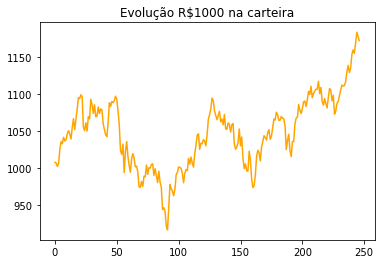

In [ ]:
plt.plot(1000*(1+R[1:]).cumprod(), color = 'orange')
plt.title('Evolução R$1000 na carteira')

In [ ]:
# matriz de covariância 
covariance = np.cov(R[1:].T)
covariance

array(0.00014785)

In [ ]:
mean_returns = retorno_precos_oot.mean() * 252
mean_returns

cod_negociacao
BBAS3     0.130431
BBDC3     0.004456
BBDC4    -0.063415
BRAP4     0.295327
BRKM5    -0.417157
BRML3     0.335903
BTOW3     0.512359
CIEL3    -0.023299
CSAN3     0.728529
ELET6     0.242963
EMBR3    -0.059518
EQTL3    -0.368171
FLRY3     0.459752
HYPE3     0.172956
IGTA3     0.251583
ITUB4     0.033314
LREN3     0.305816
MGLU3    -0.129817
PETR3     0.228420
PETR4     0.272497
QUAL3     1.134773
RADL3     0.738180
RENT3     0.483306
SANB11    0.115939
SBSP3     0.648174
VALE3     0.126928
WEGE3     0.703027
dtype: float64

In [ ]:
# risco
vol = np.sqrt(np.dot(w_pesos_arvore.T, np.dot(covariance, w_pesos_arvore))) * np.sqrt(252)
vol

0.04331523027227129

In [ ]:
# retorno
R = np.dot(mean_returns, w_pesos_arvore)
R

0.18047775418516712

In [ ]:
selic = 0.0625
        # sharpe ratio
sharpe = (R - selic)/vol
sharpe

2.7237014196526586

In [ ]:

https://medium.com/turing-talks/an%C3%A1lise-de-um-portf%C3%B3lio-de-a%C3%A7%C3%B5es-em-python-1a5e0b3455fchttps://medium.com/turing-talks/an%C3%A1lise-de-um-portf%C3%B3lio-de-a%C3%A7%C3%B5es-em-python-1a5e0b3455fc

# metodo 2  Hierarchical Risk Parity
-Marcos López de Prado: Building Diversified Portfolios that Outperform Out of Sample. The Journal of Portfolio Management, 42(4), 59–69.

In [ ]:
12.Otimização Semivariancia
Otimizando um portfólio que utiliza como objetivo a minimização da semivariancia de acordo com uma restriçao de retorno

Referência: Estrada, J (2007). Mean-Semivariance Optimization: A Heuristic Approach.

In [ ]:
df_treino  = df_resultado.drop(columns=['IBOV'])

In [ ]:
df_treino

cod_negociacao,BBAS3,BBDC3,BBDC4,BRAP4,BRFS3,BRKM5,BRML3,BTOW3,CCRO3,CIEL3,...,QUAL3,RADL3,RENT3,SANB11,SBSP3,TIMP3,USIM5,VALE3,VIVT4,WEGE3
data_pregao,,,,,,,,,,,,,,,,,,,,,
2012-01-03,24.18,25.40,31.36,33.89,35.98,13.70,19.20,9.53,12.16,48.53,...,17.25,13.40,27.70,15.81,52.20,9.62,10.82,42.72,52.19,19.10
2012-01-04,24.06,25.40,31.41,33.74,36.27,13.22,19.10,9.43,11.98,48.70,...,17.15,13.40,26.65,15.61,54.60,9.77,10.59,43.01,52.00,19.20
2012-01-05,23.81,25.21,31.21,32.81,36.48,13.05,18.25,9.06,11.90,48.00,...,17.19,13.30,25.82,15.13,53.50,9.74,10.39,41.86,51.44,19.32
2012-01-06,23.21,25.59,31.60,32.59,36.59,12.92,18.11,9.05,11.84,47.70,...,17.25,13.25,26.00,15.10,53.50,9.55,10.40,41.50,50.48,19.10
2012-01-09,23.40,25.72,31.68,32.49,35.90,12.95,18.00,9.38,11.95,47.89,...,17.00,13.30,26.62,15.34,54.10,9.74,10.59,41.45,50.47,19.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,51.06,33.32,35.69,37.89,34.81,28.38,17.95,62.70,18.84,8.47,...,36.90,107.27,47.82,47.35,59.68,15.28,9.33,54.79,57.86,33.89
2019-12-23,52.60,33.99,35.91,38.43,34.53,29.25,18.16,62.60,19.23,8.53,...,36.40,108.36,46.80,47.37,60.03,15.39,9.53,54.58,58.38,33.79
2019-12-26,53.20,34.35,36.36,39.05,35.18,30.17,18.28,62.73,19.50,8.70,...,38.12,109.75,48.26,48.36,61.61,15.59,9.53,54.79,58.89,34.85


In [ ]:
df_treino = df_treino[df_treino.index <='2018-12-30']

In [ ]:
df_treino.dropna(axis=1, how='all')  

cod_negociacao,BBAS3,BBDC3,BBDC4,BRAP4,BRFS3,BRKM5,BRML3,BTOW3,CCRO3,CIEL3,...,QUAL3,RADL3,RENT3,SANB11,SBSP3,TIMP3,USIM5,VALE3,VIVT4,WEGE3
data_pregao,,,,,,,,,,,,,,,,,,,,,
2012-01-03,24.18,25.40,31.36,33.89,35.98,13.70,19.20,9.53,12.16,48.53,...,17.25,13.40,27.70,15.81,52.20,9.62,10.82,42.72,52.19,19.10
2012-01-04,24.06,25.40,31.41,33.74,36.27,13.22,19.10,9.43,11.98,48.70,...,17.15,13.40,26.65,15.61,54.60,9.77,10.59,43.01,52.00,19.20
2012-01-05,23.81,25.21,31.21,32.81,36.48,13.05,18.25,9.06,11.90,48.00,...,17.19,13.30,25.82,15.13,53.50,9.74,10.39,41.86,51.44,19.32
2012-01-06,23.21,25.59,31.60,32.59,36.59,12.92,18.11,9.05,11.84,47.70,...,17.25,13.25,26.00,15.10,53.50,9.55,10.40,41.50,50.48,19.10
2012-01-09,23.40,25.72,31.68,32.49,35.90,12.95,18.00,9.38,11.95,47.89,...,17.00,13.30,26.62,15.34,54.10,9.74,10.59,41.45,50.47,19.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,44.08,33.50,38.00,30.53,22.50,46.95,12.75,39.34,11.61,9.05,...,13.15,57.76,28.04,42.38,30.60,12.00,9.25,49.81,46.50,17.25
2018-12-21,44.09,33.26,37.71,31.12,22.07,46.71,12.70,39.52,11.60,9.10,...,12.90,59.10,28.96,42.08,30.52,12.08,9.21,50.86,47.00,17.34
2018-12-26,44.38,32.48,36.60,30.91,21.90,46.40,12.69,38.00,11.42,8.88,...,12.69,57.80,28.80,41.41,30.73,12.04,9.15,50.44,46.95,17.00


In [ ]:
retornos_df = df_treino.pct_change().dropna()

In [ ]:
retornos_df

cod_negociacao,BBAS3,BBDC3,BBDC4,BRAP4,BRFS3,BRKM5,BRML3,BTOW3,CCRO3,CIEL3,...,QUAL3,RADL3,RENT3,SANB11,SBSP3,TIMP3,USIM5,VALE3,VIVT4,WEGE3
data_pregao,,,,,,,,,,,,,,,,,,,,,
2012-01-04,-0.004963,0.000000,0.001594,-0.004426,0.008060,-0.035036,-0.005208,-0.010493,-0.014803,0.003503,...,-0.005797,0.000000,-0.037906,-0.012650,0.045977,0.015593,-0.021257,0.006788,-0.003641,0.005236
2012-01-05,-0.010391,-0.007480,-0.006367,-0.027564,0.005790,-0.012859,-0.044503,-0.039236,-0.006678,-0.014374,...,0.002332,-0.007463,-0.031144,-0.030750,-0.020147,-0.003071,-0.018886,-0.026738,-0.010769,0.006250
2012-01-06,-0.025199,0.015073,0.012496,-0.006705,0.003015,-0.009962,-0.007671,-0.001104,-0.005042,-0.006250,...,0.003490,-0.003759,0.006971,-0.001983,0.000000,-0.019507,0.000962,-0.008600,-0.018663,-0.011387
2012-01-09,0.008186,0.005080,0.002532,-0.003068,-0.018858,0.002322,-0.006074,0.036464,0.009291,0.003983,...,-0.014493,0.003774,0.023846,0.015894,0.011215,0.019895,0.018269,-0.001205,-0.000198,0.000000
2012-01-10,0.020940,0.005054,0.002210,0.008310,-0.038997,-0.003089,0.011111,0.002132,0.013389,0.005429,...,0.002941,-0.007519,-0.001503,0.020860,-0.008318,0.016427,0.033050,-0.001206,0.004557,-0.005236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,0.006393,0.010558,0.005291,0.010258,-0.010989,-0.013863,-0.005460,0.031193,-0.015267,-0.051363,...,-0.008296,-0.029407,0.007546,-0.024850,0.027190,-0.015587,-0.046392,-0.003999,-0.001503,0.008772
2018-12-21,0.000227,-0.007164,-0.007632,0.019325,-0.019111,-0.005112,-0.003922,0.004575,-0.000861,0.005525,...,-0.019011,0.023199,0.032810,-0.007079,-0.002614,0.006667,-0.004324,0.021080,0.010753,0.005217
2018-12-26,0.006577,-0.023452,-0.029435,-0.006748,-0.007703,-0.006637,-0.000787,-0.038462,-0.015517,-0.024176,...,-0.016279,-0.021997,-0.005525,-0.015922,0.006881,-0.003311,-0.006515,-0.008258,-0.001064,-0.019608


In [ ]:
retornos_df = retornos_df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
retornos_df

cod_negociacao,BBAS3,BBDC3,BBDC4,BRAP4,BRFS3,BRKM5,BRML3,BTOW3,CCRO3,CIEL3,...,QUAL3,RADL3,RENT3,SANB11,SBSP3,TIMP3,USIM5,VALE3,VIVT4,WEGE3
data_pregao,,,,,,,,,,,,,,,,,,,,,
2012-01-04,-0.004963,0.000000,0.001594,-0.004426,0.008060,-0.035036,-0.005208,-0.010493,-0.014803,0.003503,...,-0.005797,0.000000,-0.037906,-0.012650,0.045977,0.015593,-0.021257,0.006788,-0.003641,0.005236
2012-01-05,-0.010391,-0.007480,-0.006367,-0.027564,0.005790,-0.012859,-0.044503,-0.039236,-0.006678,-0.014374,...,0.002332,-0.007463,-0.031144,-0.030750,-0.020147,-0.003071,-0.018886,-0.026738,-0.010769,0.006250
2012-01-06,-0.025199,0.015073,0.012496,-0.006705,0.003015,-0.009962,-0.007671,-0.001104,-0.005042,-0.006250,...,0.003490,-0.003759,0.006971,-0.001983,0.000000,-0.019507,0.000962,-0.008600,-0.018663,-0.011387
2012-01-09,0.008186,0.005080,0.002532,-0.003068,-0.018858,0.002322,-0.006074,0.036464,0.009291,0.003983,...,-0.014493,0.003774,0.023846,0.015894,0.011215,0.019895,0.018269,-0.001205,-0.000198,0.000000
2012-01-10,0.020940,0.005054,0.002210,0.008310,-0.038997,-0.003089,0.011111,0.002132,0.013389,0.005429,...,0.002941,-0.007519,-0.001503,0.020860,-0.008318,0.016427,0.033050,-0.001206,0.004557,-0.005236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,0.006393,0.010558,0.005291,0.010258,-0.010989,-0.013863,-0.005460,0.031193,-0.015267,-0.051363,...,-0.008296,-0.029407,0.007546,-0.024850,0.027190,-0.015587,-0.046392,-0.003999,-0.001503,0.008772
2018-12-21,0.000227,-0.007164,-0.007632,0.019325,-0.019111,-0.005112,-0.003922,0.004575,-0.000861,0.005525,...,-0.019011,0.023199,0.032810,-0.007079,-0.002614,0.006667,-0.004324,0.021080,0.010753,0.005217
2018-12-26,0.006577,-0.023452,-0.029435,-0.006748,-0.007703,-0.006637,-0.000787,-0.038462,-0.015517,-0.024176,...,-0.016279,-0.021997,-0.005525,-0.015922,0.006881,-0.003311,-0.006515,-0.008258,-0.001064,-0.019608


In [ ]:
retornos_df

cod_negociacao,BBAS3,BBDC3,BBDC4,BRAP4,BRFS3,BRKM5,BRML3,BTOW3,CCRO3,CIEL3,...,QUAL3,RADL3,RENT3,SANB11,SBSP3,TIMP3,USIM5,VALE3,VIVT4,WEGE3
data_pregao,,,,,,,,,,,,,,,,,,,,,
2012-01-04,-0.004963,0.000000,0.001594,-0.004426,0.008060,-0.035036,-0.005208,-0.010493,-0.014803,0.003503,...,-0.005797,0.000000,-0.037906,-0.012650,0.045977,0.015593,-0.021257,0.006788,-0.003641,0.005236
2012-01-05,-0.010391,-0.007480,-0.006367,-0.027564,0.005790,-0.012859,-0.044503,-0.039236,-0.006678,-0.014374,...,0.002332,-0.007463,-0.031144,-0.030750,-0.020147,-0.003071,-0.018886,-0.026738,-0.010769,0.006250
2012-01-06,-0.025199,0.015073,0.012496,-0.006705,0.003015,-0.009962,-0.007671,-0.001104,-0.005042,-0.006250,...,0.003490,-0.003759,0.006971,-0.001983,0.000000,-0.019507,0.000962,-0.008600,-0.018663,-0.011387
2012-01-09,0.008186,0.005080,0.002532,-0.003068,-0.018858,0.002322,-0.006074,0.036464,0.009291,0.003983,...,-0.014493,0.003774,0.023846,0.015894,0.011215,0.019895,0.018269,-0.001205,-0.000198,0.000000
2012-01-10,0.020940,0.005054,0.002210,0.008310,-0.038997,-0.003089,0.011111,0.002132,0.013389,0.005429,...,0.002941,-0.007519,-0.001503,0.020860,-0.008318,0.016427,0.033050,-0.001206,0.004557,-0.005236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,0.006393,0.010558,0.005291,0.010258,-0.010989,-0.013863,-0.005460,0.031193,-0.015267,-0.051363,...,-0.008296,-0.029407,0.007546,-0.024850,0.027190,-0.015587,-0.046392,-0.003999,-0.001503,0.008772
2018-12-21,0.000227,-0.007164,-0.007632,0.019325,-0.019111,-0.005112,-0.003922,0.004575,-0.000861,0.005525,...,-0.019011,0.023199,0.032810,-0.007079,-0.002614,0.006667,-0.004324,0.021080,0.010753,0.005217
2018-12-26,0.006577,-0.023452,-0.029435,-0.006748,-0.007703,-0.006637,-0.000787,-0.038462,-0.015517,-0.024176,...,-0.016279,-0.021997,-0.005525,-0.015922,0.006881,-0.003311,-0.006515,-0.008258,-0.001064,-0.019608


In [ ]:
hrp_portfolio = HRPOpt(retornos_df)

In [ ]:
hrp_portfolio.optimize()

OrderedDict([('BBAS3', 0.029688826055530144),
             ('BBDC3', 0.015906184207522735),
             ('BBDC4', 0.03082338656450798),
             ('BRAP4', 0.015582718040602106),
             ('BRFS3', 0.01647798130525099),
             ('BRKM5', 0.016659601978240166),
             ('BRML3', 0.0157573312342458),
             ('BTOW3', 0.024800116638043396),
             ('CCRO3', 0.01583210725892245),
             ('CIEL3', 0.016599610729693837),
             ('CMIG4', 0.016029893991978558),
             ('CSAN3', 0.016076647583662007),
             ('CSNA3', 0.02826552419344461),
             ('CYRE3', 0.030829587264869063),
             ('ECOR3', 0.01563745608322739),
             ('ELET3', 0.015281819675893224),
             ('ELET6', 0.01573957281992509),
             ('EMBR3', 0.016853431353042216),
             ('ENBR3', 0.031395383983235534),
             ('EQTL3', 0.032111196000467454),
             ('FLRY3', 0.032015531735613854),
             ('GGBR4', 0.03013973597969899

In [ ]:
pesos_hrp = np.array([0.029688826055530155,
0.015906184207522756,
0.030823386564507924,
0.015582718040602118,
0.016477981305251008,
0.016659601978240148,
0.015757331234245796,
0.024800116638043376,
0.015832107258922454,
0.016599610729693837,
0.01602989399197857,
0.016076647583662028,
0.02826552419344463,
0.03082958726486905,
0.015637456083227367,
0.01528181967589323,
0.015739572819925083,
0.016853431353042205,
0.03139538398323556,
0.032111196000467426,
0.03201553173561384,
0.030139735979698993,
0.01538973840472288,
0.023231336202454277,
0.016216651310139656,
0.03112386577911098,
0.015669499626472096,
0.015513326385647938,
0.03142826265344064,
0.030986008149373707,
0.016745916564065186,
0.009887509520175839,
0.03087934401294701,
0.015779984175342675,
0.01650144132124452,
0.016180276384441854,
0.015600779432454711,
0.029518831338809927,
0.016516483922825547,
0.031716446085067226,
0.016161808913742047,
0.01586674705272516,
0.031112131009289248,
0.015721374082497415,
0.014943259055480137,
0.015622539143934907,
0.01631226102578464,
0.016870533770192223])

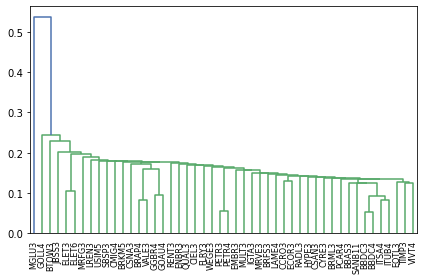

In [ ]:
pdf = plotting.plot_dendrogram(hrp_portfolio)

In [ ]:
acoes_compra_hrp = ('BBAS3',
'BBDC3',
'BBDC4',
'BRAP4',
'BRFS3',
'BRKM5',
'BRML3',
'BTOW3',
'CCRO3',
'CIEL3',
'CMIG4',
'CSAN3',
'CSNA3',
'CYRE3',
'ECOR3',
'ELET3',
'ELET6',
'EMBR3',
'ENBR3',
'EQTL3',
'FLRY3',
'GGBR4',
'GOAU4',
'GOLL4',
'HYPE3',
'IGTA3',
'ITSA4',
'ITUB4',
'JBSS3',
'LAME4',
'LREN3',
'MGLU3',
'MRFG3',
'MRVE3',
'MULT3',
'PCAR4',
'PETR3',
'PETR4',
'QUAL3',
'RADL3',
'RENT3',
'SANB11',
'SBSP3',
'TIMP3',
'USIM5',
'VALE3',
'VIVT4',
'WEGE3')

In [ ]:
data_retorno_hrp = data_201901.loc[data_201901['cod_negociacao'].isin(acoes_compra_hrp)]

In [ ]:
#calcular o 
data_retorno_hrp = data_retorno_hrp[['data_pregao','cod_negociacao','preco_ultimo_negocio']]

In [ ]:
novo_df = data_retorno_hrp.reset_index()
df_parcial = novo_df.pivot(index="data_pregao", columns="cod_negociacao", values="preco_ultimo_negocio")
data_retorno_max_hrp = df_parcial.fillna(0)

In [ ]:
retorno_precos_oot_hrp = data_retorno_max_hrp.pct_change()

retorno_precos_oot_hrp

cod_negociacao,BBAS3,BBDC3,BBDC4,BRAP4,BRFS3,BRKM5,BRML3,BTOW3,CCRO3,CIEL3,...,QUAL3,RADL3,RENT3,SANB11,SBSP3,TIMP3,USIM5,VALE3,VIVT4,WEGE3
data_pregao,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.004115,0.020408,0.009656,-0.038276,-0.039768,0.006003,0.006686,0.010233,0.032500,-0.023884,...,0.005865,-0.002293,-0.016521,0.033013,0.077102,-0.018930,-0.021516,-0.040908,0.008902,0.022803
2019-01-04,0.000000,-0.021918,-0.007847,0.067559,-0.001861,-0.011111,-0.019188,-0.033149,-0.011299,0.079787,...,-0.017493,0.014319,-0.010211,-0.001058,0.022690,0.005034,0.058639,0.065102,-0.002101,0.011419
2019-01-07,-0.006557,0.008403,0.011864,0.007832,0.006527,-0.007074,-0.006020,-0.044286,-0.028571,-0.008867,...,-0.029674,-0.022307,-0.018636,0.016737,-0.022715,0.032554,0.001978,-0.005365,0.008421,-0.015591
2019-01-08,-0.011345,0.011111,0.006106,-0.007150,0.062066,-0.000629,0.001514,0.046338,0.028571,-0.033797,...,0.016820,0.036542,0.000678,-0.033965,0.003784,0.037995,-0.035538,0.009632,0.002296,-0.008192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,-0.001955,-0.028571,-0.020850,0.010400,0.012802,0.013210,-0.002778,-0.017395,-0.008421,-0.008197,...,-0.002703,0.014278,-0.022086,0.006376,0.000671,0.039456,0.001073,0.014630,0.010832,0.008631
2019-12-23,0.030161,0.020108,0.006164,0.014252,-0.008044,0.030655,0.011699,-0.001595,0.020701,0.007084,...,-0.013550,0.010161,-0.021330,0.000422,0.005865,0.007199,0.021436,-0.003833,0.008987,-0.002951
2019-12-26,0.011407,0.010591,0.012531,0.016133,0.018824,0.031453,0.006608,0.002077,0.014041,0.019930,...,0.047253,0.012828,0.031197,0.020899,0.026320,0.012995,0.000000,0.003848,0.008736,0.031370


In [ ]:
# Retornos de Portfolio
R_hrp = np.dot(retorno_precos_oot_hrp, pesos_hrp)
pd.DataFrame(R_hrp, columns = ['R_hrp'])

,R_hrp
0,NaN
1,0.010592
2,0.002373
3,-0.006894
4,0.005876
...,...
243,0.000283
244,0.010419
245,0.013926
246,-0.004517


Text(0.5, 1.0, 'Evolução R$1000 na carteira')

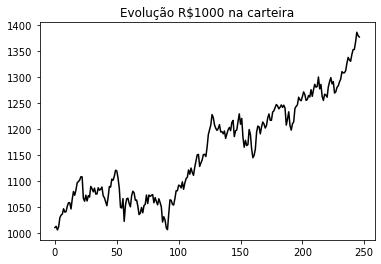

In [ ]:
retorno_cumulativo_carteira_hrp = np.cumprod(R_hrp[1:] + 1)-1

#plt.plot(1000*(1+R[1:]).cumprod(), color = 'orange')
plt.plot(1000*(1+R_hrp[1:]).cumprod(), color = 'black')
plt.title('Evolução R$1000 na carteira')

In [ ]:
# matriz de covariância 
covariance = np.cov(R_hrp[1:].T)
covariance

array(0.00012836)

In [ ]:
mean_returns_hrp = retorno_precos_oot_hrp.mean() * 252
mean_returns_hrp

cod_negociacao
BBAS3     0.130431
BBDC3     0.004456
BBDC4    -0.063415
BRAP4     0.295327
BRFS3     0.530341
BRKM5    -0.417157
BRML3     0.335903
BTOW3     0.512359
CCRO3     0.522851
CIEL3    -0.023299
CMIG4     0.000594
CSAN3     0.728529
CSNA3     0.543135
CYRE3     0.700182
ECOR3     0.579541
ELET3     0.355611
ELET6     0.242963
EMBR3    -0.059518
ENBR3     0.487049
EQTL3    -0.368171
FLRY3     0.459752
GGBR4     0.327362
GOAU4     0.315866
GOLL4     0.492299
HYPE3     0.172956
IGTA3     0.251583
ITSA4     0.139381
ITUB4     0.033314
JBSS3     0.874742
LAME4     0.335486
LREN3     0.305816
MGLU3    -0.129817
MRFG3     0.664126
MRVE3     0.623661
MULT3     0.323791
PCAR4     0.100289
PETR3     0.228420
PETR4     0.272497
QUAL3     1.134773
RADL3     0.738180
RENT3     0.483306
SANB11    0.115939
SBSP3     0.648174
TIMP3     0.293612
USIM5     0.039954
VALE3     0.126928
VIVT4     0.228865
WEGE3     0.703027
dtype: float64

In [ ]:
# risco
vol = np.sqrt(np.dot(pesos_hrp.T, np.dot(covariance, pesos_hrp))) * np.sqrt(252)
vol

0.027386576192076875

In [ ]:
# retorno
R_hrp = np.dot(mean_returns_hrp, pesos_hrp)
R_hrp

0.34334482296798585

In [ ]:
selic = 0.0625
        # sharpe ratio
sharpe = (R_hrp - selic)/vol
sharpe

10.254835106012127

In [ ]:
https://medium.com/turing-talks/teoria-moderna-do-portf%C3%B3lio-em-python-e8bad41ebb8b

fronteira eficiente

In [ ]:
retornos_df_fe = df_treino.pct_change().dropna()

In [ ]:
retornos_df_fe

cod_negociacao,BBAS3,BBDC3,BBDC4,BRAP4,BRFS3,BRKM5,BRML3,BTOW3,CCRO3,CIEL3,...,QUAL3,RADL3,RENT3,SANB11,SBSP3,TIMP3,USIM5,VALE3,VIVT4,WEGE3
data_pregao,,,,,,,,,,,,,,,,,,,,,
2012-01-04,-0.004963,0.000000,0.001594,-0.004426,0.008060,-0.035036,-0.005208,-0.010493,-0.014803,0.003503,...,-0.005797,0.000000,-0.037906,-0.012650,0.045977,0.015593,-0.021257,0.006788,-0.003641,0.005236
2012-01-05,-0.010391,-0.007480,-0.006367,-0.027564,0.005790,-0.012859,-0.044503,-0.039236,-0.006678,-0.014374,...,0.002332,-0.007463,-0.031144,-0.030750,-0.020147,-0.003071,-0.018886,-0.026738,-0.010769,0.006250
2012-01-06,-0.025199,0.015073,0.012496,-0.006705,0.003015,-0.009962,-0.007671,-0.001104,-0.005042,-0.006250,...,0.003490,-0.003759,0.006971,-0.001983,0.000000,-0.019507,0.000962,-0.008600,-0.018663,-0.011387
2012-01-09,0.008186,0.005080,0.002532,-0.003068,-0.018858,0.002322,-0.006074,0.036464,0.009291,0.003983,...,-0.014493,0.003774,0.023846,0.015894,0.011215,0.019895,0.018269,-0.001205,-0.000198,0.000000
2012-01-10,0.020940,0.005054,0.002210,0.008310,-0.038997,-0.003089,0.011111,0.002132,0.013389,0.005429,...,0.002941,-0.007519,-0.001503,0.020860,-0.008318,0.016427,0.033050,-0.001206,0.004557,-0.005236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,0.006393,0.010558,0.005291,0.010258,-0.010989,-0.013863,-0.005460,0.031193,-0.015267,-0.051363,...,-0.008296,-0.029407,0.007546,-0.024850,0.027190,-0.015587,-0.046392,-0.003999,-0.001503,0.008772
2018-12-21,0.000227,-0.007164,-0.007632,0.019325,-0.019111,-0.005112,-0.003922,0.004575,-0.000861,0.005525,...,-0.019011,0.023199,0.032810,-0.007079,-0.002614,0.006667,-0.004324,0.021080,0.010753,0.005217
2018-12-26,0.006577,-0.023452,-0.029435,-0.006748,-0.007703,-0.006637,-0.000787,-0.038462,-0.015517,-0.024176,...,-0.016279,-0.021997,-0.005525,-0.015922,0.006881,-0.003311,-0.006515,-0.008258,-0.001064,-0.019608


In [ ]:
retornos_df_fe = retornos_df_fe.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

In [ ]:
retornos_df_fe

cod_negociacao,BBAS3,BBDC3,BBDC4,BRAP4,BRFS3,BRKM5,BRML3,BTOW3,CCRO3,CIEL3,...,QUAL3,RADL3,RENT3,SANB11,SBSP3,TIMP3,USIM5,VALE3,VIVT4,WEGE3
data_pregao,,,,,,,,,,,,,,,,,,,,,
2012-01-04,-0.004963,0.000000,0.001594,-0.004426,0.008060,-0.035036,-0.005208,-0.010493,-0.014803,0.003503,...,-0.005797,0.000000,-0.037906,-0.012650,0.045977,0.015593,-0.021257,0.006788,-0.003641,0.005236
2012-01-05,-0.010391,-0.007480,-0.006367,-0.027564,0.005790,-0.012859,-0.044503,-0.039236,-0.006678,-0.014374,...,0.002332,-0.007463,-0.031144,-0.030750,-0.020147,-0.003071,-0.018886,-0.026738,-0.010769,0.006250
2012-01-06,-0.025199,0.015073,0.012496,-0.006705,0.003015,-0.009962,-0.007671,-0.001104,-0.005042,-0.006250,...,0.003490,-0.003759,0.006971,-0.001983,0.000000,-0.019507,0.000962,-0.008600,-0.018663,-0.011387
2012-01-09,0.008186,0.005080,0.002532,-0.003068,-0.018858,0.002322,-0.006074,0.036464,0.009291,0.003983,...,-0.014493,0.003774,0.023846,0.015894,0.011215,0.019895,0.018269,-0.001205,-0.000198,0.000000
2012-01-10,0.020940,0.005054,0.002210,0.008310,-0.038997,-0.003089,0.011111,0.002132,0.013389,0.005429,...,0.002941,-0.007519,-0.001503,0.020860,-0.008318,0.016427,0.033050,-0.001206,0.004557,-0.005236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,0.006393,0.010558,0.005291,0.010258,-0.010989,-0.013863,-0.005460,0.031193,-0.015267,-0.051363,...,-0.008296,-0.029407,0.007546,-0.024850,0.027190,-0.015587,-0.046392,-0.003999,-0.001503,0.008772
2018-12-21,0.000227,-0.007164,-0.007632,0.019325,-0.019111,-0.005112,-0.003922,0.004575,-0.000861,0.005525,...,-0.019011,0.023199,0.032810,-0.007079,-0.002614,0.006667,-0.004324,0.021080,0.010753,0.005217
2018-12-26,0.006577,-0.023452,-0.029435,-0.006748,-0.007703,-0.006637,-0.000787,-0.038462,-0.015517,-0.024176,...,-0.016279,-0.021997,-0.005525,-0.015922,0.006881,-0.003311,-0.006515,-0.008258,-0.001064,-0.019608


Otimizando o Portifólio

In [ ]:
retornos_df_fe

cod_negociacao,BBAS3,BBDC3,BBDC4,BRAP4,BRFS3,BRKM5,BRML3,BTOW3,CCRO3,CIEL3,...,QUAL3,RADL3,RENT3,SANB11,SBSP3,TIMP3,USIM5,VALE3,VIVT4,WEGE3
data_pregao,,,,,,,,,,,,,,,,,,,,,
2012-01-04,-0.004963,0.000000,0.001594,-0.004426,0.008060,-0.035036,-0.005208,-0.010493,-0.014803,0.003503,...,-0.005797,0.000000,-0.037906,-0.012650,0.045977,0.015593,-0.021257,0.006788,-0.003641,0.005236
2012-01-05,-0.010391,-0.007480,-0.006367,-0.027564,0.005790,-0.012859,-0.044503,-0.039236,-0.006678,-0.014374,...,0.002332,-0.007463,-0.031144,-0.030750,-0.020147,-0.003071,-0.018886,-0.026738,-0.010769,0.006250
2012-01-06,-0.025199,0.015073,0.012496,-0.006705,0.003015,-0.009962,-0.007671,-0.001104,-0.005042,-0.006250,...,0.003490,-0.003759,0.006971,-0.001983,0.000000,-0.019507,0.000962,-0.008600,-0.018663,-0.011387
2012-01-09,0.008186,0.005080,0.002532,-0.003068,-0.018858,0.002322,-0.006074,0.036464,0.009291,0.003983,...,-0.014493,0.003774,0.023846,0.015894,0.011215,0.019895,0.018269,-0.001205,-0.000198,0.000000
2012-01-10,0.020940,0.005054,0.002210,0.008310,-0.038997,-0.003089,0.011111,0.002132,0.013389,0.005429,...,0.002941,-0.007519,-0.001503,0.020860,-0.008318,0.016427,0.033050,-0.001206,0.004557,-0.005236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,0.006393,0.010558,0.005291,0.010258,-0.010989,-0.013863,-0.005460,0.031193,-0.015267,-0.051363,...,-0.008296,-0.029407,0.007546,-0.024850,0.027190,-0.015587,-0.046392,-0.003999,-0.001503,0.008772
2018-12-21,0.000227,-0.007164,-0.007632,0.019325,-0.019111,-0.005112,-0.003922,0.004575,-0.000861,0.005525,...,-0.019011,0.023199,0.032810,-0.007079,-0.002614,0.006667,-0.004324,0.021080,0.010753,0.005217
2018-12-26,0.006577,-0.023452,-0.029435,-0.006748,-0.007703,-0.006637,-0.000787,-0.038462,-0.015517,-0.024176,...,-0.016279,-0.021997,-0.005525,-0.015922,0.006881,-0.003311,-0.006515,-0.008258,-0.001064,-0.019608


In [ ]:
df_treino

cod_negociacao,BBAS3,BBDC3,BBDC4,BRAP4,BRFS3,BRKM5,BRML3,BTOW3,CCRO3,CIEL3,...,QUAL3,RADL3,RENT3,SANB11,SBSP3,TIMP3,USIM5,VALE3,VIVT4,WEGE3
data_pregao,,,,,,,,,,,,,,,,,,,,,
2012-01-03,24.18,25.40,31.36,33.89,35.98,13.70,19.20,9.53,12.16,48.53,...,17.25,13.40,27.70,15.81,52.20,9.62,10.82,42.72,52.19,19.10
2012-01-04,24.06,25.40,31.41,33.74,36.27,13.22,19.10,9.43,11.98,48.70,...,17.15,13.40,26.65,15.61,54.60,9.77,10.59,43.01,52.00,19.20
2012-01-05,23.81,25.21,31.21,32.81,36.48,13.05,18.25,9.06,11.90,48.00,...,17.19,13.30,25.82,15.13,53.50,9.74,10.39,41.86,51.44,19.32
2012-01-06,23.21,25.59,31.60,32.59,36.59,12.92,18.11,9.05,11.84,47.70,...,17.25,13.25,26.00,15.10,53.50,9.55,10.40,41.50,50.48,19.10
2012-01-09,23.40,25.72,31.68,32.49,35.90,12.95,18.00,9.38,11.95,47.89,...,17.00,13.30,26.62,15.34,54.10,9.74,10.59,41.45,50.47,19.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,44.08,33.50,38.00,30.53,22.50,46.95,12.75,39.34,11.61,9.05,...,13.15,57.76,28.04,42.38,30.60,12.00,9.25,49.81,46.50,17.25
2018-12-21,44.09,33.26,37.71,31.12,22.07,46.71,12.70,39.52,11.60,9.10,...,12.90,59.10,28.96,42.08,30.52,12.08,9.21,50.86,47.00,17.34
2018-12-26,44.38,32.48,36.60,30.91,21.90,46.40,12.69,38.00,11.42,8.88,...,12.69,57.80,28.80,41.41,30.73,12.04,9.15,50.44,46.95,17.00


In [ ]:
port_returns = []

In [ ]:
port_volatility = []

In [ ]:
port_weights = []

In [ ]:
num_assets = len(df_treino.columns)

In [ ]:
df_treino

cod_negociacao,BBAS3,BBDC3,BBDC4,BRAP4,BRFS3,BRKM5,BRML3,BTOW3,CCRO3,CIEL3,...,QUAL3,RADL3,RENT3,SANB11,SBSP3,TIMP3,USIM5,VALE3,VIVT4,WEGE3
data_pregao,,,,,,,,,,,,,,,,,,,,,
2012-01-03,24.18,25.40,31.36,33.89,35.98,13.70,19.20,9.53,12.16,48.53,...,17.25,13.40,27.70,15.81,52.20,9.62,10.82,42.72,52.19,19.10
2012-01-04,24.06,25.40,31.41,33.74,36.27,13.22,19.10,9.43,11.98,48.70,...,17.15,13.40,26.65,15.61,54.60,9.77,10.59,43.01,52.00,19.20
2012-01-05,23.81,25.21,31.21,32.81,36.48,13.05,18.25,9.06,11.90,48.00,...,17.19,13.30,25.82,15.13,53.50,9.74,10.39,41.86,51.44,19.32
2012-01-06,23.21,25.59,31.60,32.59,36.59,12.92,18.11,9.05,11.84,47.70,...,17.25,13.25,26.00,15.10,53.50,9.55,10.40,41.50,50.48,19.10
2012-01-09,23.40,25.72,31.68,32.49,35.90,12.95,18.00,9.38,11.95,47.89,...,17.00,13.30,26.62,15.34,54.10,9.74,10.59,41.45,50.47,19.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,44.08,33.50,38.00,30.53,22.50,46.95,12.75,39.34,11.61,9.05,...,13.15,57.76,28.04,42.38,30.60,12.00,9.25,49.81,46.50,17.25
2018-12-21,44.09,33.26,37.71,31.12,22.07,46.71,12.70,39.52,11.60,9.10,...,12.90,59.10,28.96,42.08,30.52,12.08,9.21,50.86,47.00,17.34
2018-12-26,44.38,32.48,36.60,30.91,21.90,46.40,12.69,38.00,11.42,8.88,...,12.69,57.80,28.80,41.41,30.73,12.04,9.15,50.44,46.95,17.00


In [ ]:
individual_rets = df_treino.resample('Y').last().pct_change().mean()

In [ ]:
def generate_wallets(df, num_portfolios = 10000, risk_free = 0):
    # vetores de dados
    portfolio_weights = []
    portfolio_exp_returns = []
    portfolio_vol = []
    portfolio_sharpe = []

    # retorno simples 
    r = df.pct_change()
    r = r.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
    mean_returns = r.mean() * 252

    # matriz de covariância 
    covariance = np.cov(r[1:].T)

    for i in range(num_portfolios):
        # gerando pesos aleatórios
        k = np.random.rand(len(df.columns))
        w = k / sum (k)

        # retorno
        R = np.dot(mean_returns, w)

        # risco
        vol = np.sqrt(np.dot(w.T, np.dot(covariance, w))) * np.sqrt(252)

        # sharpe ratio
        sharpe = (R - risk_free)/vol

        portfolio_weights.append(w)
        portfolio_exp_returns.append(R)
        portfolio_vol.append(vol)
        portfolio_sharpe.append(sharpe)

    wallets = {'weights': portfolio_weights,
              'returns': portfolio_exp_returns,
              'vol':portfolio_vol,
              'sharpe': portfolio_sharpe}
    
    #wallets = pd.DataFrame(wallets)

    return wallets

In [ ]:
salva = pd.DataFrame(generate_wallets(df_treino))

In [ ]:
salva

,weights,returns,vol,sharpe
0,"[0.001996744188812584, 0.0013443062340693956, ...",-1.186882,1.167599,-1.016516
1,"[0.009238003426338787, 0.0015677142976573213, ...",-1.164526,1.168470,-0.996625
2,"[0.017260283853146558, 0.006268194481104072, 0...",-1.181372,1.168555,-1.010968
3,"[0.03653689808123865, 0.009918063360690416, 0....",-1.220733,1.165183,-1.047675
4,"[0.03755119942217635, 0.01248853176205208, 0.0...",-1.190628,1.167353,-1.019938
...,...,...,...,...
9995,"[0.007855350670019023, 0.0010954306195438122, ...",-1.184864,1.169405,-1.013220
9996,"[0.011782067608358525, 0.017872581630909604, 0...",-1.212784,1.166184,-1.039959
9997,"[0.03164253174912734, 0.03947332693259355, 0.0...",-1.202674,1.166132,-1.031336
9998,"[0.0416212414132062, 0.02098828439222276, 0.00...",-1.188733,1.167178,-1.018468


In [ ]:
def best_portfolio(wallets):
    sharpe = wallets['sharpe']
    weights = wallets['weights']
    
    indice = np.array(sharpe).argmax()
        
    return weights[indice]

In [ ]:
best_portfolio(salva)

array([0.04636602, 0.00056496, 0.03177429, 0.00277003, 0.00137662,
       0.04485791, 0.02452774, 0.03421571, 0.02157156, 0.00488435,
       0.01585225, 0.02826628, 0.03475188, 0.02319338, 0.0076809 ,
       0.04511978, 0.03191844, 0.0450044 , 0.01031392, 0.01925707,
       0.00251569, 0.0048088 , 0.00819786, 0.02505799, 0.02036661,
       0.02633876, 0.02464113, 0.035583  , 0.00792515, 0.00623401,
       0.04420813, 0.04735661, 0.00458549, 0.01080566, 0.02572346,
       0.03443772, 0.01858553, 0.03680849, 0.00168713, 0.00679692,
       0.02536642, 0.00346391, 0.00530044, 0.02622994, 0.03567107,
       0.0205575 , 0.01397754, 0.00250151])

In [ ]:
def plot_efficient_frontier(wallets):
    vol = wallets['vol']
    returns = wallets['returns']
    sharpe = wallets['sharpe']

    indice = np.array(sharpe).argmax()
    y_axis = returns[indice]
    X_axis = vol[indice]

    plt.scatter(vol, returns, c = sharpe, cmap = 'viridis')
    plt.scatter(X_axis, y_axis, c = 'red', s = 50)
    plt.title("Efficient Frontier")
    plt.xlabel("Volatility")
    plt.ylabel("Expected return")
    plt.show()

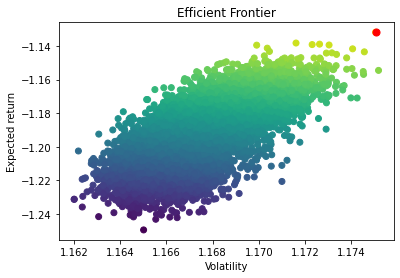

In [ ]:
plot_efficient_frontier(salva)

In [ ]:
pesos_mk = best_portfolio(salva)

In [ ]:
data_retorno_mk = data_201901.loc[data_201901['cod_negociacao'].isin(acoes_compra_hrp)]

In [ ]:
#calcular o 
data_retorno_mk = data_retorno_mk[['data_pregao','cod_negociacao','preco_ultimo_negocio']]

In [ ]:
novo_df = data_retorno_mk.reset_index()
df_parcial = novo_df.pivot(index="data_pregao", columns="cod_negociacao", values="preco_ultimo_negocio")
data_retorno_max_mk = df_parcial.fillna(0)

In [ ]:
retorno_precos_oot_mk = data_retorno_max_mk.pct_change()

In [ ]:
# Retornos de Portfolio
R_mk = np.dot(retorno_precos_oot_mk, pesos_mk)
pd.DataFrame(R_mk, columns = ['R_mk'])


,R_mk
0,NaN
1,0.009963
2,-0.005810
3,-0.007311
4,0.007156
...,...
243,0.000882
244,0.014336
245,0.010641
246,-0.006474


Text(0.5, 1.0, 'Evolução R$1000 na carteira')

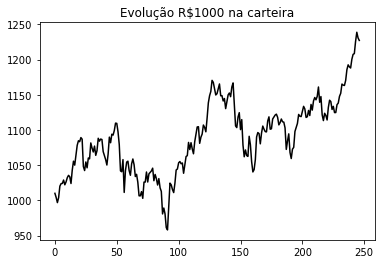

In [ ]:
retorno_cumulativo_carteira_mk = np.cumprod(R_mk[1:] + 1)-1

#plt.plot(1000*(1+R[1:]).cumprod(), color = 'orange')
plt.plot(1000*(1+R_mk[1:]).cumprod(), color = 'black')
plt.title('Evolução R$1000 na carteira')

Sharpe Ratio
Todo investimento possui uma certa taxa de risco associada a ele, mas é certo que alguns investimentos são mais seguros do que outros, certo?

O Sharpe Ratio é uma métrica utilizada para nos ajudar a analisar se estamos sendo devidamente recompensados por uma taxa adicional de risco assumido. Para isso, ele compara o retorno de um investimento que possui um risco associado com um outro de "risco livre". No caso de uma carteira de ações na bolsa brasileira, ele poderia comparar o retorno dela com um o retorno de um investimento em renda fixa, por exemplo.

Para calcular o sharpe ratio subtraimos o taxa de risco livre do retorno do portfólio e dividimos esse valor pelo risco do portfólio:


Fórmula do Sharpe Ratio
Quanto maior for o valor do Sharpe Ratio, mais atraente será esse investimento dado o risco associado. Porém, um valor negativo significa que a taxa livre de risco é maior que o retorno do portfólio. De maneira geral, um sharpe ratio maior que 1 é considerado bom.

In [ ]:
Sharpe Ratio

S = (Rp - Rf)/Vol Portfolio

#Selic - taxa livre de risco

selic = 0.0625

In [ ]:
# matriz de covariância 
covariance = np.cov(R_mk[1:].T)
covariance

array(0.00014685)

In [ ]:
mean_returns_mk = retorno_precos_oot_mk.mean() * 252
mean_returns_mk

cod_negociacao
BBAS3     0.130431
BBDC3     0.004456
BBDC4    -0.063415
BRAP4     0.295327
BRFS3     0.530341
BRKM5    -0.417157
BRML3     0.335903
BTOW3     0.512359
CCRO3     0.522851
CIEL3    -0.023299
CMIG4     0.000594
CSAN3     0.728529
CSNA3     0.543135
CYRE3     0.700182
ECOR3     0.579541
ELET3     0.355611
ELET6     0.242963
EMBR3    -0.059518
ENBR3     0.487049
EQTL3    -0.368171
FLRY3     0.459752
GGBR4     0.327362
GOAU4     0.315866
GOLL4     0.492299
HYPE3     0.172956
IGTA3     0.251583
ITSA4     0.139381
ITUB4     0.033314
JBSS3     0.874742
LAME4     0.335486
LREN3     0.305816
MGLU3    -0.129817
MRFG3     0.664126
MRVE3     0.623661
MULT3     0.323791
PCAR4     0.100289
PETR3     0.228420
PETR4     0.272497
QUAL3     1.134773
RADL3     0.738180
RENT3     0.483306
SANB11    0.115939
SBSP3     0.648174
TIMP3     0.293612
USIM5     0.039954
VALE3     0.126928
VIVT4     0.228865
WEGE3     0.703027
dtype: float64

In [ ]:
# risco
vol = np.sqrt(np.dot(pesos_mk.T, np.dot(covariance, pesos_mk))) * np.sqrt(252)
vol

0.033795563735297

In [ ]:
# retorno
R_mk = np.dot(mean_returns_mk, pesos_mk)
R_mk

0.2274140551006577

In [ ]:
selic = 0.0625
        # sharpe ratio
sharpe = (R_mk - selic)/vol
sharpe

4.8797545261367254

Arvore 

sharpe

2.7237014196526586

Hierarquico

8.7654907627594

marcok

4.863298722377052

Text(0.5, 1.0, 'Evolução R$1000 na carteira')

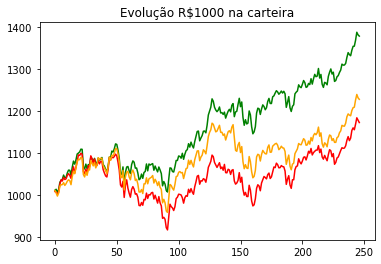

In [ ]:
plt.plot(1000*(1+R_hrp[1:]).cumprod(), color = 'green')
plt.plot(1000*(1+R[1:]).cumprod(), color = 'red')
plt.plot(1000*(1+R_mk[1:]).cumprod(), color = 'orange')
plt.title('Evolução R$1000 na carteira')

In [ ]:
https://towardsdatascience.com/calculating-sharpe-ratio-with-python-755dcb346805

In [ ]:
https://medium.com/turing-talks/teoria-moderna-do-portf%C3%B3lio-em-python-e8bad41ebb8b
    
    https://www.bcb.gov.br/controleinflacao/historicotaxasjuros